
##**Proyek Akhir KASDD**

<h2 align="center"><strong>Kafka</strong></h2>

<h3 align="center"><strong>Dataset: Cycling Segments Leaderboard (CSL)</strong></h3>

<p align="center">
Ramadhan Andika Putra<br>
2206081976
</p>

# Deskripsi Dataset dan Preprocessing

Dataset mencakup berbagai informasi, seperti:<br>
* **user_age_group:** Grup usia peserta
* **user_weight_category:** Grup berat badan peserta
* **user_id:** User ID
* **attempt_date:** Tanggal log bersepeda
* **gender:** Jenis kelamin peserta
* **smt_rank:** Rank peserta di suatu segmen dan gender
* **smt_avg_spd:** Kecepatan rata-rata peserta di suatu segmen (lintasan) dalam km/jam
* **smt_finish_seconds:** Waktu yang dibutuhkan peserta untuk menyelesaikan suatu segmen (lintasan) dalam detik
* **smt_name:** Nama segmen (lintasan)
* **act_title:** Judul log aktivitas bersepeda
* **act_avg_spd:** Kecepatan rata-rata peserta di suatu log (sepanjang segmen + di luar segmen) dalam km/jam
* **act_max_spd:** Kecepatan maksimum peserta di suatu log (sepanjang segmen + di luar segmen) dalam km/jam
* **act_total_km:** Total jarak yang ditempuh peserta di suatu log (sepanjang segmen + di luar segmen) dalam km
* **act_moving_seconds:** Total waktu bersepeda peserta di suatu log (sepanjang segmen + di luar segmen) dalam detik
* **act_total_seconds:** Total waktu suatu log (sepanjang segmen + di luar segmen) dalam detik
* **has_hr_data:** Ada atau tidaknya data detak jantung di log tersebut

In [478]:
!pip install pandas

In [479]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns #untuk visualisasi
import plotly.express as px #untuk visualisasi
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm

from numpy import polyfit
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, OrdinalEncoder

In [480]:
import warnings
warnings.filterwarnings('ignore')

## Membuat dan Membaca Informasi *Dataframe*

In [481]:
df = pd.read_csv("https://drive.google.com/uc?id=1FUIyjpZSSDVb9QAvHR5Am4v3BxTYQu4x")

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6292 entries, 0 to 6291
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_age_group        6292 non-null   object 
 1   user_id               6292 non-null   int64  
 2   attempt_date          6292 non-null   object 
 3   gender                6292 non-null   object 
 4   smt_rank              6292 non-null   int64  
 5   smt_avg_spd           6292 non-null   float64
 6   smt_finish_seconds    6292 non-null   int64  
 7   smt_name              6292 non-null   object 
 8   user_weight_category  5932 non-null   object 
 9   act_title             6292 non-null   object 
 10  act_avg_spd           6292 non-null   float64
 11  act_max_spd           6292 non-null   float64
 12  act_total_km          6292 non-null   float64
 13  act_moving_seconds    6292 non-null   int64  
 14  act_total_seconds     6292 non-null   int64  
 15  has_hr_data          

In [483]:
df.head()

user_age_group  user_id attempt_date  ... act_total_seconds  has_hr_data    id
0       25 to 34     1972   2017-12-22  ...              5103            0  6977
1       25 to 34      239   2015-04-13  ...              3926            0  3518
2       25 to 34      405   2018-02-07  ...              5152            0   415
3       25 to 34      318   2018-08-24  ...              7548            1  1755
4       25 to 34      628   2020-03-06  ...             17493            0  7088

[5 rows x 17 columns]

In [484]:
df.describe()

user_id     smt_rank  smt_avg_spd  ...  act_total_seconds  has_hr_data           id
count  6292.000000  6292.000000   6292.00000  ...       6.292000e+03  6292.000000  6292.000000
mean    782.421964   172.515893     26.80925  ...       1.252379e+04     0.196440  3947.028608
std     539.051866   173.487689      8.44806  ...       2.157781e+05     0.397337  2261.820409
min       2.000000     1.000000      0.80000  ...       2.640000e+02     0.000000     1.000000
25%     335.000000    37.000000     21.30000  ...       4.095000e+03     0.000000  2004.750000
50%     703.500000   108.000000     26.50000  ...       5.781500e+03     0.000000  3941.000000
75%    1096.000000   267.000000     32.50000  ...       8.098500e+03     0.000000  5907.250000
max    2254.000000   805.000000     87.30000  ...       1.167978e+07     1.000000  7863.000000

[8 rows x 11 columns]

## Handle *Missing Values*

In [485]:
df.isnull().sum()

user_age_group            0
user_id                   0
attempt_date              0
gender                    0
smt_rank                  0
smt_avg_spd               0
smt_finish_seconds        0
smt_name                  0
user_weight_category    360
act_title                 0
act_avg_spd               0
act_max_spd               0
act_total_km              0
act_moving_seconds        0
act_total_seconds         0
has_hr_data               0
id                        0
dtype: int64

In [486]:
col_na = df.isnull().sum().sort_values(ascending=False)
percent = col_na / len(df)

missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

                      Total   Percent
user_weight_category    360  0.057216


In [487]:
df[df.isna().any(axis=1)]

user_age_group  user_id attempt_date  ... act_total_seconds  has_hr_data    id
18         25 to 34      222   2019-10-23  ...              5253            0  2057
54         25 to 34      320   2018-01-13  ...              2451            0  6552
69         35 to 44      824   2019-09-16  ...              7821            0  4224
71         25 to 34     1925   2019-12-09  ...              3640            0  6888
80         25 to 34      222   2019-12-16  ...              6987            0  1226
...             ...      ...          ...  ...               ...          ...   ...
6167       25 to 34      369   2016-11-23  ...              4402            0   379
6200       55 to 64     1275   2020-02-28  ...             14305            0  3073
6232       25 to 34     1486   2018-03-14  ...              2206            0  3890
6265       25 to 34     1954   2019-07-12  ...              2961            0  6949
6287       25 to 34      573   2018-07-16  ...              8446            0  5226

[360 rows x 17 columns]

In [488]:
df_clean = df.copy()

In [489]:
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [490]:
df_clean['user_weight_category'] = fill_null_mode(df_clean['user_weight_category'])

In [491]:
df_clean.isnull().sum()

user_age_group          0
user_id                 0
attempt_date            0
gender                  0
smt_rank                0
smt_avg_spd             0
smt_finish_seconds      0
smt_name                0
user_weight_category    0
act_title               0
act_avg_spd             0
act_max_spd             0
act_total_km            0
act_moving_seconds      0
act_total_seconds       0
has_hr_data             0
id                      0
dtype: int64

## Handle duplicate data

In [492]:
duplicate_rows = df_clean[df_clean.duplicated()]
duplicate_total_rows, duplicate_total_attributes = duplicate_rows.shape
print('jumlah data duplicate: ', duplicate_total_rows)

jumlah data duplicate:  0


In [493]:
df_clean.drop(["id", "user_id"], axis = 1, inplace=True)

## Handle Outlier

In [494]:
def hitung_outlier(df) :
    outliers_dict = {}
    outliers_percentage_dict = {}

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.select_dtypes(include=numerics) :
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        outliers = df[col][
            (df[col] > q3 + 1.5 * iqr) |
            (df[col] < q1 - 1.5 * iqr)
        ]
        outliers_dict[col] = len(outliers)
        outliers_percentage_dict[col] = (len(outliers) / len(df)) * 100

    outliers_values = tuple(outliers_dict.values())
    outliers_percentage_values = tuple(outliers_percentage_dict.values())

    outliers_df = pd.DataFrame([outliers_values, outliers_percentage_values],
                            columns=list(outliers_dict.keys()),
                            index=['Outliers count', 'Outliers percentage (%)'])
    display(outliers_df)

In [495]:
hitung_outlier(df_clean)

smt_rank  smt_avg_spd  ...  act_total_seconds  has_hr_data
Outliers count           163.000000    53.000000  ...         296.000000  1236.000000
Outliers percentage (%)    2.590591     0.842339  ...           4.704387    19.643992

[2 rows x 9 columns]

<Axes: >

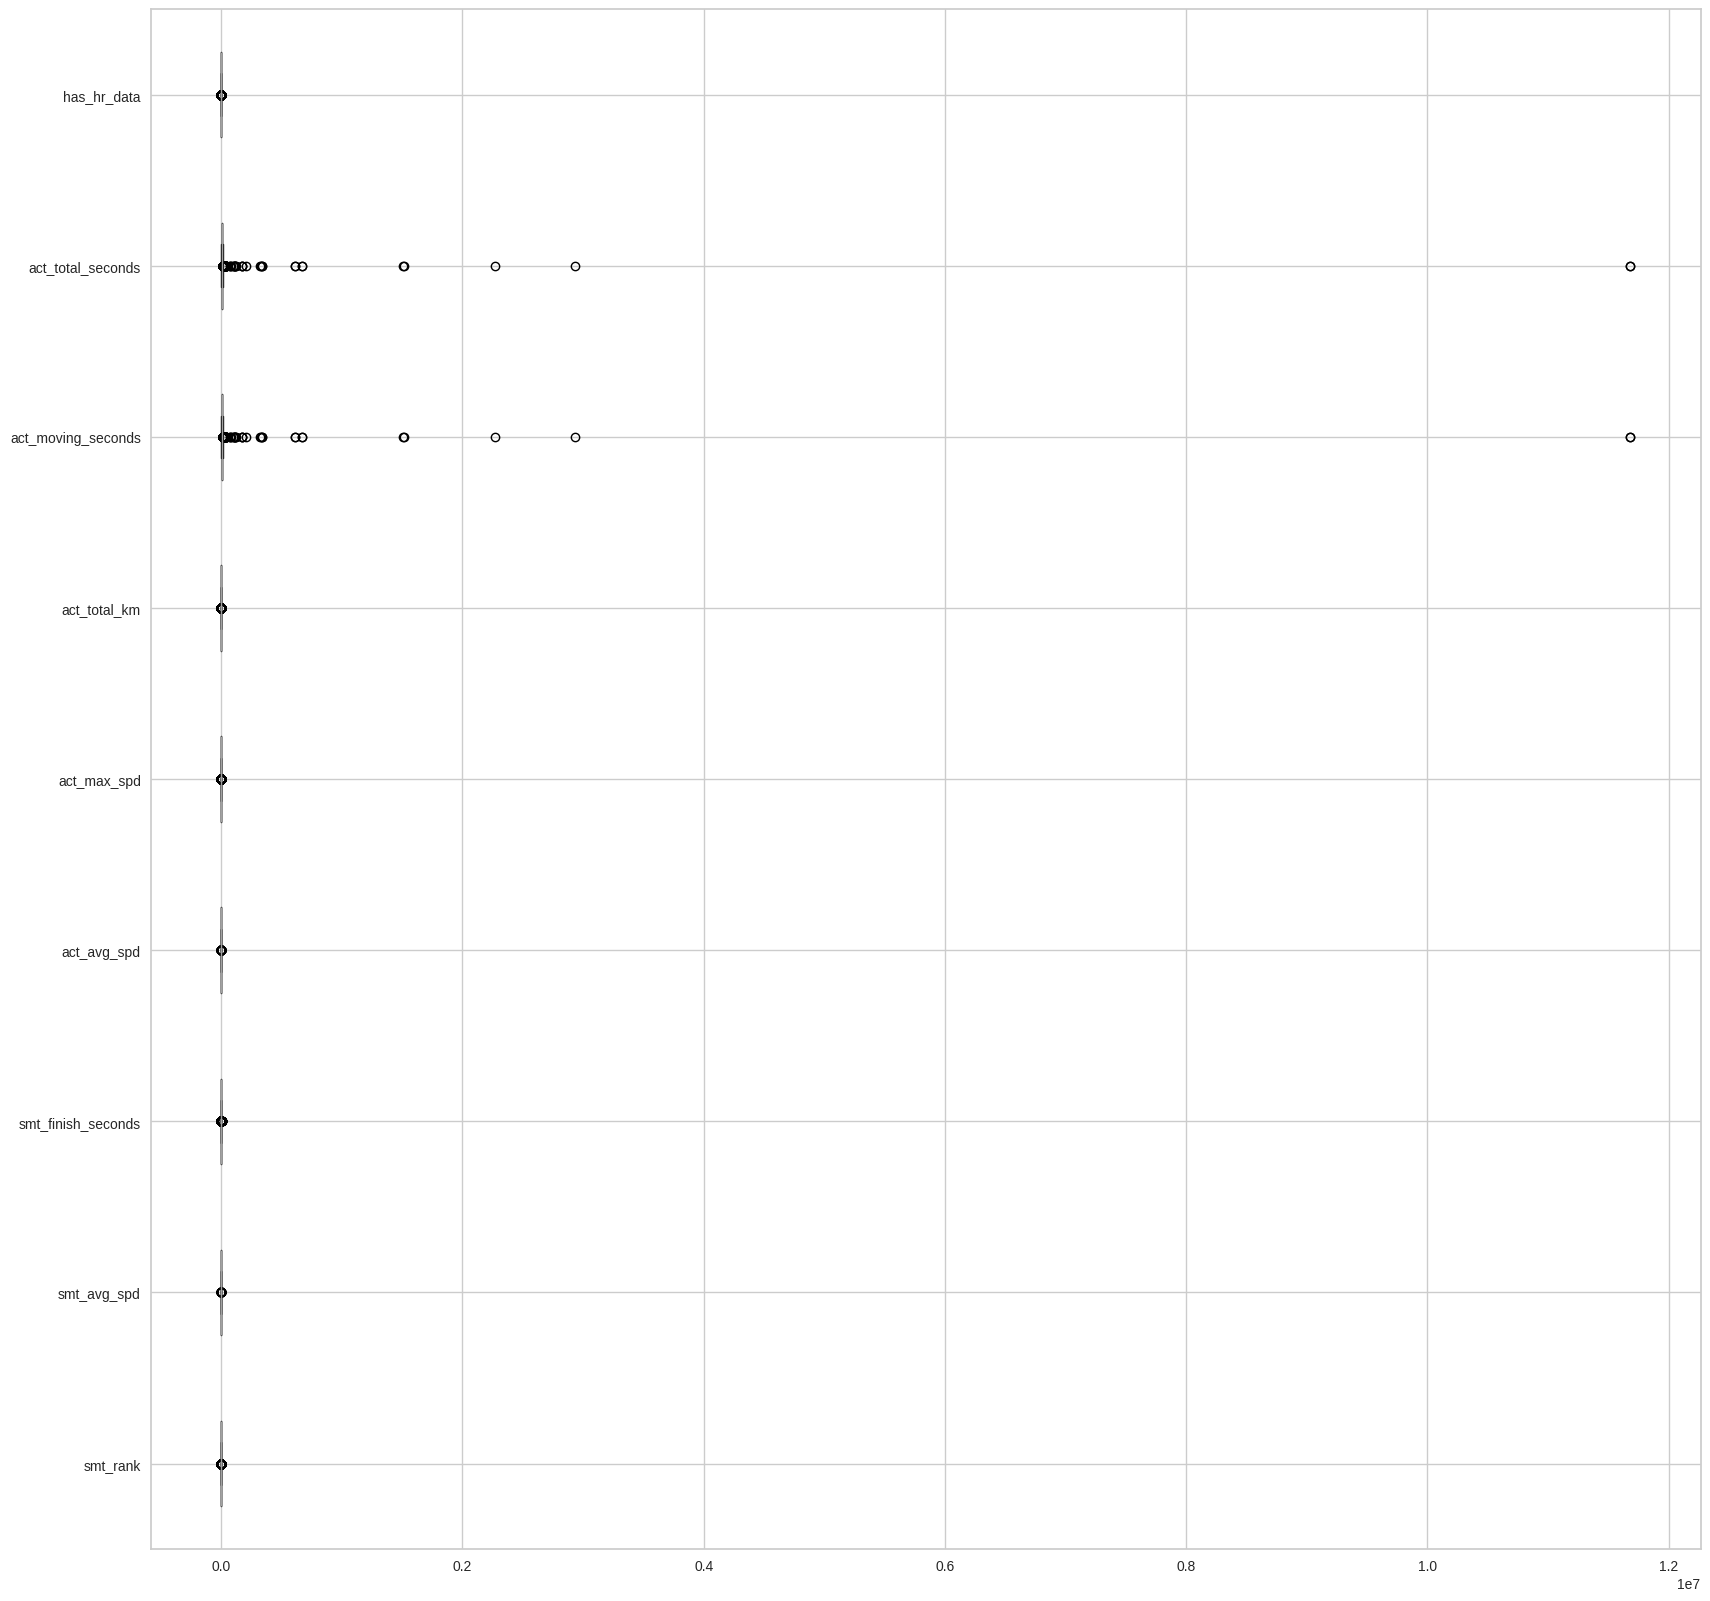

In [496]:
df_clean.boxplot(vert=False, figsize=(20,20))

# Exploratory Data Analysis

## Pengaruh umur dan berat badan ke performa bersepeda

### Pemilihan atribut lanjutan

Berikut adalah penjelasan mengenai alasan pemilihan setiap fitur untuk menganalisis pengaruh umur dan berat badan ke performa bersepeda:  

1. **`user_age_group`**  
   - Atribut ini digunakan untuk mengidentifikasi bagaimana pengaruh usia terhadap performa bersepeda untuk setiap gender.

2. **`user_weight_category`**  
   - Atribut ini berhubungan langsung dengan kekuatan dan efisiensi saat bersepeda. Analisis berdasarkan kategori berat badan memungkinkan kita memahami bagaimana faktor ini memengaruhi perbedaan performa antar gender.

3. **`act_avg_spd`**  
   - Kecepatan rata-rata adalah indikator utama performa bersepeda, mencerminkan kemampuan fisik dan efisiensi peserta di sepanjang perjalanan.

4. **`act_total_km`**  
   - Jarak total adalah indikator ketahanan fisik dan stamina peserta. Peserta yang mampu menempuh jarak lebih jauh dengan kecepatan tinggi menunjukkan performa yang lebih baik, sehingga fitur ini relevan untuk mengukur hubungan dengan usia dan berat badan.

### *Pre-Processing* Lanjutan

In [497]:
df_eda1 = df_clean.copy()
df_eda1

user_age_group attempt_date  gender  ...  act_moving_seconds  act_total_seconds  has_hr_data
0          25 to 34   2017-12-22    male  ...                5103               5103            0
1          25 to 34   2015-04-13    male  ...                3926               3926            0
2          25 to 34   2018-02-07    male  ...                5152               5152            0
3          25 to 34   2018-08-24    male  ...                7548               7548            1
4          25 to 34   2020-03-06  female  ...               17493              17493            0
...             ...          ...     ...  ...                 ...                ...          ...
6287       25 to 34   2018-07-16    male  ...                8446               8446            0
6288       35 to 44   2018-11-21    male  ...                5026               5026            1
6289       35 to 44   2013-08-11    male  ...               10374              10374            0
6290       35 to 44   2015-04-24    male  ...               10158              10158            0
6291       35 to 44   2019-04-25    male  ...                8494               8494            0

[6292 rows x 15 columns]

Mengurutkan `user_age_group` dan `user_weight_category`

In [498]:
# Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal
for col in df_eda1.select_dtypes(include=object).columns:
    print(col, f": {len(df_eda1[col].unique())}", df_eda1[col].unique())

user_age_group : 9 ['25 to 34' '19 and under' '35 to 44' '55 to 64' '45 to 54' '20 to 24'
 '65 to 69' '75+' '70 to 74']
attempt_date : 1457 ['2017-12-22' '2015-04-13' '2018-02-07' ... '2016-04-21' '2019-08-31'
 '2019-04-25']
gender : 2 ['male' 'female']
smt_name : 9 ['Headquarters Business Park' 'Oghor 2 SailsIsland' 'Starbucks to Majid'
 'Al Fardoos to shellfish round about' 'North Corniche' 'King Street side'
 'S.Ubhur Alkurnaysh South Bound with detour' 'Obhur North Short'
 'PRINCE SULTAN - ASSALAM TO FATIMA']
user_weight_category : 8 ['54 kg and under' '105 kg to 114 kg' '75 to 84 kg' '65 to 74 kg'
 '115 kg and over' '85 to 95 kg' '95 kg to 104 kg' '55 to 64 kg']
act_title : 1051 ['Night Ride' 'Evening Ride' 'Afternoon Ride' ...
 'Evening Ride مسائي للوحوش' 'Evening Ride With Jeddah Cyclists '
 'Nice Relaxed Ride next the Red Sea']


In [499]:
age_group_order = [
    '19 and under', '20 to 24', '25 to 34',
    '35 to 44', '45 to 54', '55 to 64',
    '65 to 69', '70 to 74', '75+'
]

weight_category_order = [
    '54 kg and under', '55 to 64 kg', '65 to 74 kg',
    '75 to 84 kg', '85 to 95 kg', '95 kg to 104 kg',
    '105 kg to 114 kg', '115 kg and over'
]

In [500]:
df_eda1['user_age_group'] = pd.Categorical(df_eda1['user_age_group'], categories=age_group_order, ordered=True)
df_eda1['user_weight_category'] = pd.Categorical(df_eda1['user_weight_category'], categories=weight_category_order, ordered=True)

In [501]:
df_eda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6292 entries, 0 to 6291
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   user_age_group        6292 non-null   category
 1   attempt_date          6292 non-null   object  
 2   gender                6292 non-null   object  
 3   smt_rank              6292 non-null   int64   
 4   smt_avg_spd           6292 non-null   float64 
 5   smt_finish_seconds    6292 non-null   int64   
 6   smt_name              6292 non-null   object  
 7   user_weight_category  6292 non-null   category
 8   act_title             6292 non-null   object  
 9   act_avg_spd           6292 non-null   float64 
 10  act_max_spd           6292 non-null   float64 
 11  act_total_km          6292 non-null   float64 
 12  act_moving_seconds    6292 non-null   int64   
 13  act_total_seconds     6292 non-null   int64   
 14  has_hr_data           6292 non-null   int64   
dtypes: c

### Menganalisis pengaruh umur dan berat badan ke performa bersepeda menggunakan *bubble chart*

In [502]:
# Menghitung rata-rata performa dan handle NaN
performance_by_group = df_eda1.groupby(['user_age_group', 'user_weight_category']).agg({
    'act_avg_spd': 'mean',
    'act_total_km': 'mean',
}).reset_index()

# Hapus baris dengan NaN
performance_by_group = performance_by_group.dropna()

# Bubble chart
fig = px.scatter(performance_by_group,
                x ='user_age_group',
                y ='user_weight_category',
                size='act_total_km',
                color='act_avg_spd',
                title='Performa Bersepeda berdasarkan Kelompok Usia dan Kategori Berat Badan',
                labels={
                    'user_age_group': 'Kelompok Usia',
                    'user_weight_category': 'Kategori Berat Badan',
                    'act_avg_spd': 'Kecepatan Rata-rata (km/jam)',
                    'act_total_km': 'Jarak Total (km)'
                })

fig.show()

*Insight* yang diperoleh:
*   kelompok usia menengah keatas (25-69 tahun) dengan berat badan sedang (65-84 kg) memiliki performa terbaik jika berdasarkan kecepatan rata-rata dan jarak total yang ditempuh.
*   Kelompok usia yang lebih muda (19 tahun ke bawah) atau yang lebih tua (65 tahun ke atas) dengan berat badan yang sangat ringan (54 kg ke bawah) atau sangat berat (115 kg ke atas), cenderung menghasilkan kecepatan rata-rata yang lebih rendah dan jarak total yang ditempuh lebih kecil (performanya kurang).
*   Jarak total yang ditempuh lebih besar pada kelompok usia menengah dengan berat badan sedang. Hal tersebut mengindikasikan bahwa kombinasi umur dan berat badan tidak hanya memungkinkan performa kecepatan bersepeda yang lebih tinggi, tetapi juga performa untuk menempuh jarak yang lebih jauh.

### Menganalisis pengaruh umur dan berat badan ke performa bersepeda menggunakan *3D Scatter Plot*

In [503]:
# 3D Scatter Plot
fig = px.scatter_3d(performance_by_group,
                    x ='user_age_group',
                    y ='user_weight_category',
                    z ='act_avg_spd',
                    color ='act_total_km',
                    size ='act_total_km',
                    title ='Performa Bersepeda berdasarkan Kelompok Usia dan Kategori Berat Badan',
                    labels={
                        'user_age_group': 'Kelompok Usia',
                        'user_weight_category': 'Kategori Berat Badan',
                        'act_avg_spd': 'Kecepatan (km/jam)',
                        'act_total_km': 'Jarak Total (km)'
                    })

fig.update_layout(
    scene=dict(
        xaxis_title='Kelompok Usia',
        yaxis_title='Kategori Berat Badan',
        zaxis_title='Kecepatan (km/jam)'
    ),
    width=945,
    height=735
)

fig.show()

*Insight* yang diperoleh:
*   Titik-titik dengan kecepatan rata-rata tinggi (26-28 km/jam) dan jarak total yang ditempuh lebih besar (ditunjukkan oleh warna orange cerah hingga kuning) cenderung berada pada kelompok usia menengah (25-69 tahun) dengan berat badan sedang(65-84 kg). Ini menunjukkan bahwa kelompok tersebut memiliki performa terbaik.
*   Pada kelompok usia sangat muda (19 tahun ke bawah) dan sangat tua (55 tahun ke atas), kecepatan rata-rata cenderung lebih rendah (22-24 km/jam). Selain itu, jarak total yang ditempuh oleh kelompok ini cenderung lebih kecil, seperti yang terlihat dari dominasi warna lebih gelap (ungu hingga biru) di kelompok tersebut.
*   Kategori berat badan yang terlalu rendah (54 kg ke bawah) atau terlalu tinggi (115 kg ke atas) menunjukkan penurunan performa, dengan kecepatan rata-rata lebih rendah dan jarak total yang lebih pendek. Hal ini terlihat dari titik-titik yang lebih terkonsentrasi di area bawah plot, dengan warna lebih gelap.

### Menganalisis pengaruh umur dengan `act_avg_speed` menggunakan *Violin Plot*

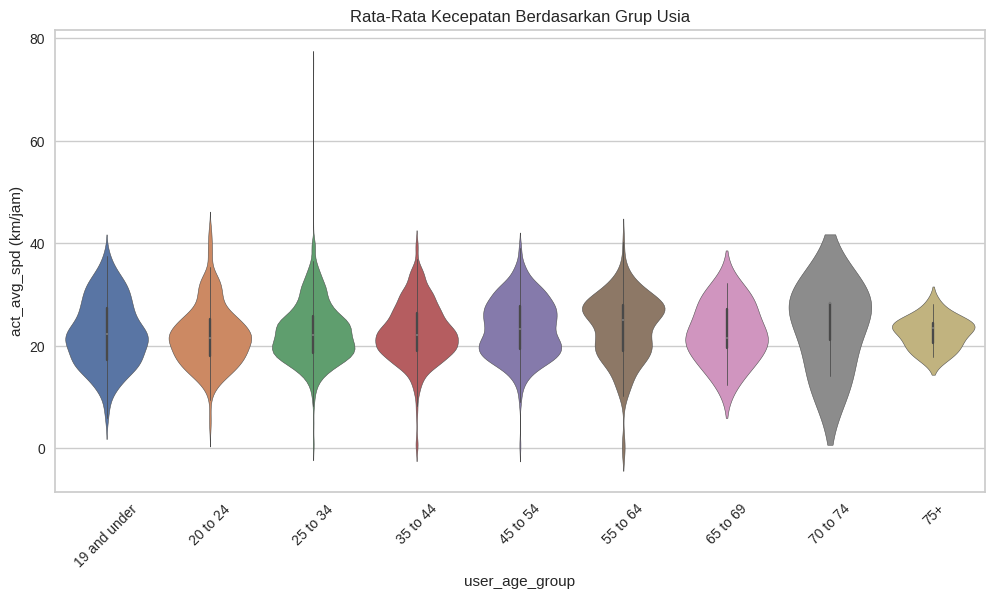

In [504]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='user_age_group', y='act_avg_spd', data=df_eda1, palette='deep')
plt.title('Rata-Rata Kecepatan Berdasarkan Grup Usia')
plt.xlabel('user_age_group')
plt.ylabel('act_avg_spd (km/jam)')
plt.xticks(rotation=45)
plt.show()

*Insight* yang diperoleh:
*   Kelompok usia 25-69 tahun menunjukkan distribusi kecepatan yang relatif konsisten, yang mengindikasikan kemampuan fisik yang stabil selama rentang usia ini.
*   Kecepatan rata-rata berkurang secara signifikan setelah usia 75 tahun, yang mengindikasikan dampak bertambahnya usia terhadap kemampuan fisik saat bersepeda.

### Menganalisis pengaruh berat badan dengan `act_avg_speed` menggunakan *Violin Plot*

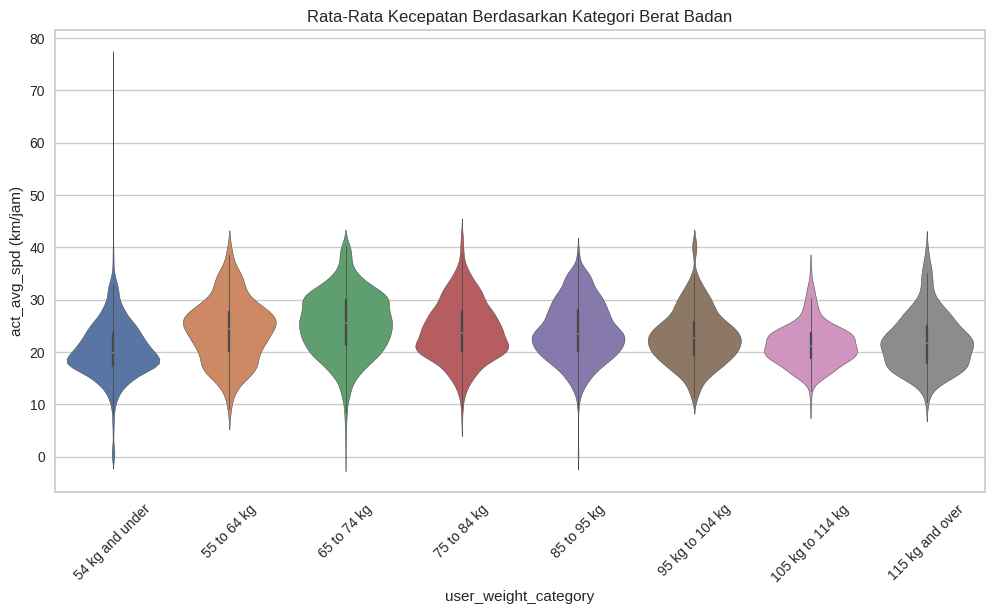

In [505]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='user_weight_category', y='act_avg_spd', data=df_eda1, palette='deep')
plt.title('Rata-Rata Kecepatan Berdasarkan Kategori Berat Badan')
plt.xlabel('user_weight_category')
plt.ylabel('act_avg_spd (km/jam)')
plt.xticks(rotation=45)
plt.show()

*Insight* yang diperoleh:
*   Kategori berat badan 65-84 kg menunjukkan distribusi kecepatan yang lebih stabil dan konsisten, yang mengindikasikan efisiensi tenaga yang optimal untuk bersepeda.
*   Kategori berat badan yang sangat ringan (54 kg keatas) atau sangat berat (105 kg kebawah) menunjukkan distribusi kecepatan yang lebih lebar dengan rata-rata lebih rendah, yang mengindikasikan performa yang kurang efisien dibandingkan kategori berat badan sedang.

### Menganalisis pengaruh umur dengan `act_total_km` menggunakan *Violin Plot*

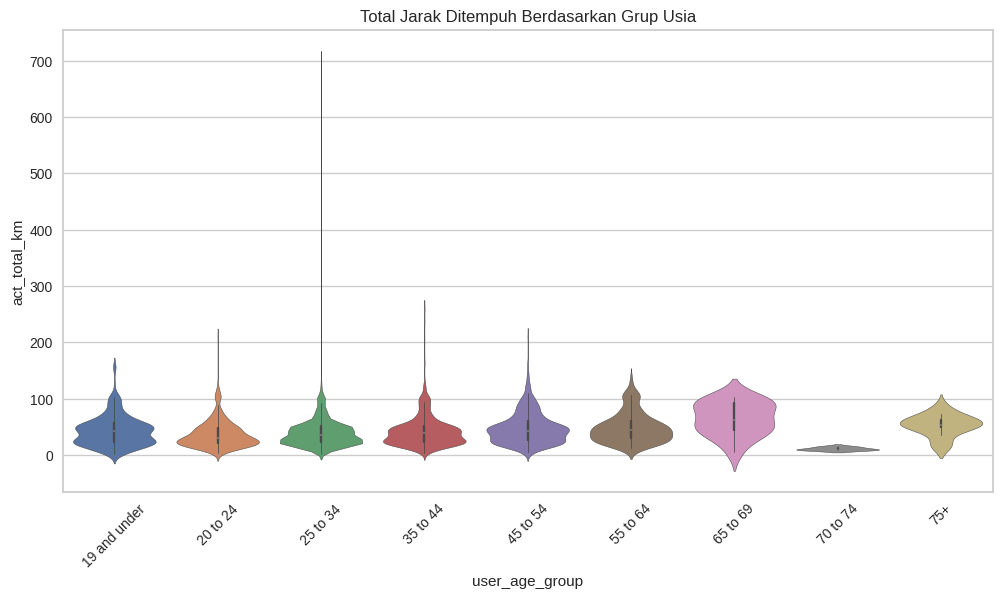

In [506]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='user_age_group', y='act_total_km', data=df_eda1, palette='deep')
plt.title('Total Jarak Ditempuh Berdasarkan Grup Usia')
plt.xlabel('user_age_group')
plt.ylabel('act_total_km')
plt.xticks(rotation=45)
plt.show()

*Insight* yang diperoleh:
*   Kelompok usia 25-54 tahun menunjukkan distribusi jarak total yang lebih konsisten, yang mengindikasikan kemampuan fisik yang optimal untuk menempuh jarak yang lebih jauh.
*   Kelompok usia 70 tahun ke atas menunjukkan jarak tempuh yang lebih rendah dengan distribusi yang lebih sempit, yang mendindikasikan penurunan stamina atau kemampuan fisik seiring bertambahnya usia.

### Menganalisis pengaruh berat badan dengan `act_total_km` menggunakan *Violin Plot*

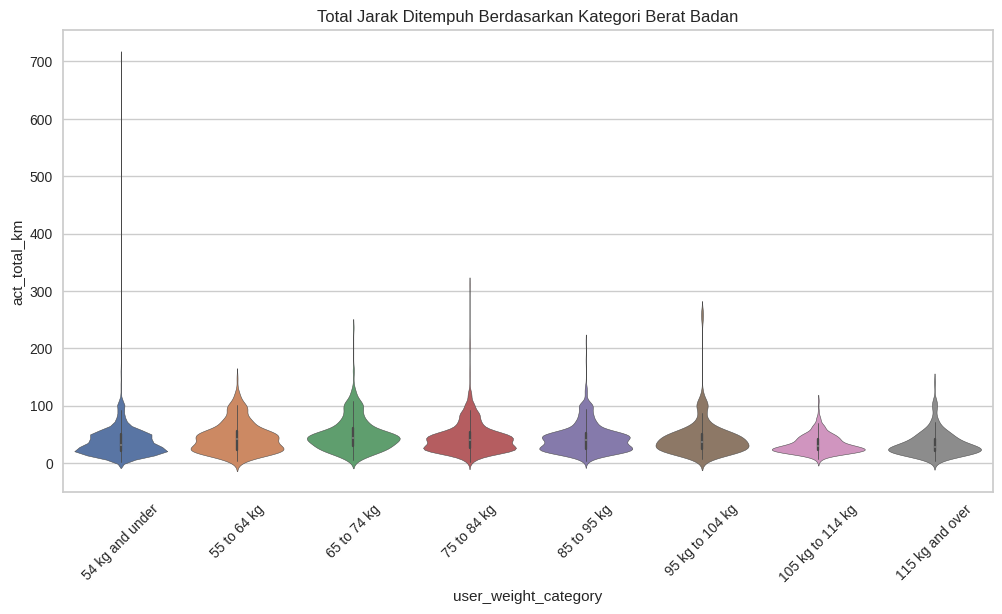

In [507]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='user_weight_category', y='act_total_km', data=df_eda1, palette='deep')
plt.title('Total Jarak Ditempuh Berdasarkan Kategori Berat Badan')
plt.xlabel('user_weight_category')
plt.ylabel('act_total_km')
plt.xticks(rotation=45)
plt.show()

*Insight* yang diperoleh:
*   Kategori berat badan 65-95 kg menunjukkan distribusi jarak total yang lebih konsisten dan stabil, yang mengindikasikan efisiensi fisik yang optimal untuk menempuh jarak jauh.
*   Kategori berat badan yang sangat ringan (54 kg kebawah) atau sangat berat (105 kg keatas) memiliki distribusi jarak yang lebih lebar dengan jarak rata-rata yang lebih rendah, menunjukkan bahwa performa menurun pada kategori berat badan ekstrem.

### Menganalisis pengaruh umur dan berat badan dengan `act_avg_speed` menggunakan *Heatmap*

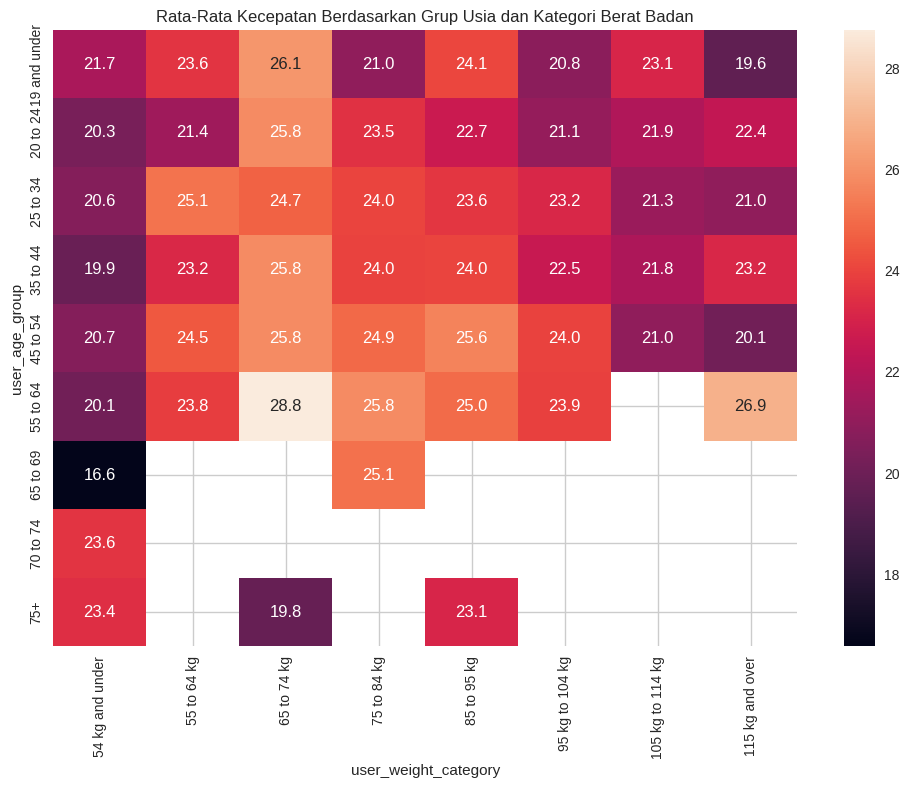

In [508]:
# Pivot table untuk heatmap
pivot_table = df_eda1.pivot_table(index='user_age_group', columns='user_weight_category', values='act_avg_spd', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f")
plt.title('Rata-Rata Kecepatan Berdasarkan Grup Usia dan Kategori Berat Badan')
plt.ylabel('user_age_group')
plt.xlabel('user_weight_category')
plt.show()

*Insight* yang diperoleh:
*   Kecepatan rata-rata cenderung lebih tinggi pada kelompok usia menengah (25-64 tahun) dibandingkan usia yang lebih muda (20 tahun kebawah) atau lebih tua (65 tahun keatas). Hal ini menunjukkan bahwa usia produktif memiliki performa terbaik dalam bersepeda.
*   Peserta dengan berat badan dalam kategori sedang (55-95 kg) cenderung memiliki kecepatan rata-rata lebih tinggi dibandingkan kategori berat badan yang sangat ringan (54 kg kebawah) atau sangat berat (95 kg keatas), yang mungkin mencerminkan efisiensi tenaga optimal pada berat badan tertentu.
*   Kombinasi kelompok usia 55-64 tahun dan kategori berat badan 65-74 kg menunjukkan kecepatan tertinggi (28.8 km/jam), yang dapat menjadi indikasi kelompok dengan ketahanan dan efisiensi optimal di antara semua kombinasi. Namun, kecepatan menurun signifikan pada usia tua (65 tahun keatas) di semua kategori berat badan.

### Menganalisis pengaruh umur dan berat badan dengan `act_total_km` menggunakan *Heatmap*

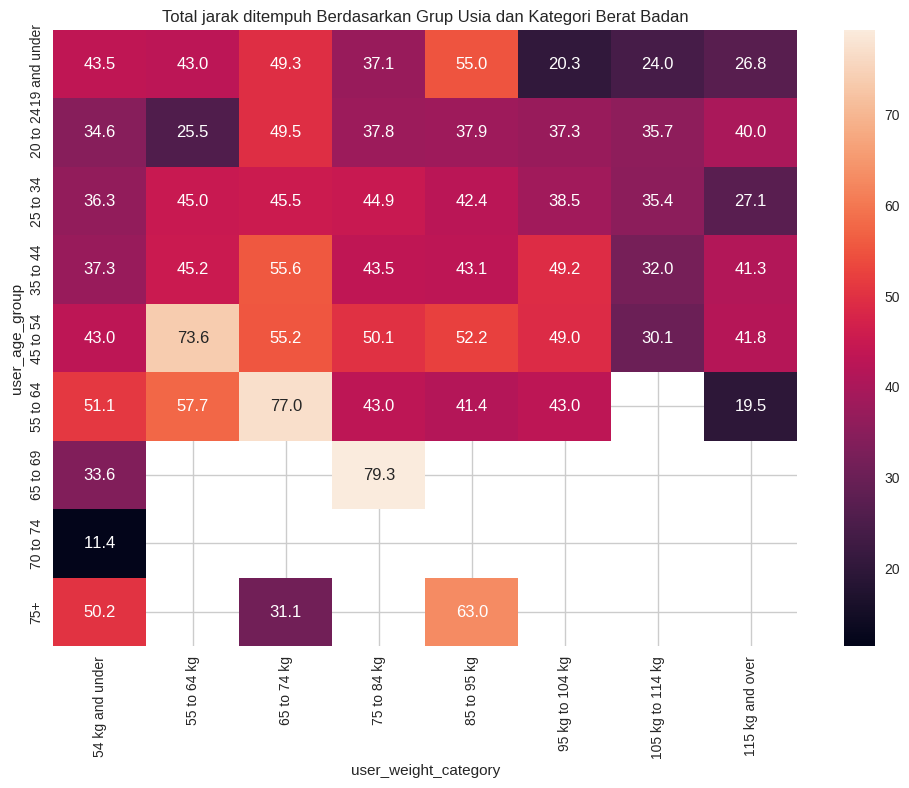

In [509]:
# Pivot table untuk heatmap
pivot_table = df_eda1.pivot_table(index='user_age_group', columns='user_weight_category', values='act_total_km', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f")
plt.title('Total jarak ditempuh Berdasarkan Grup Usia dan Kategori Berat Badan')
plt.ylabel('user_age_group')
plt.xlabel('user_weight_category')
plt.show()

*Insight* yang diperoleh:
*   Kelompok usia 65-69 tahun menempuh jarak total tertinggi (79.3 km) di kategori berat badan 75-84 kg. Ini mengindikasikan bahwa kelompok usia ini memiliki ketahanan fisik yang optimal dibandingkan kelompok usia lainnya.
*   Peserta dengan berat badan sedang (55-95 kg) cenderung menempuh jarak lebih jauh dibandingkan kategori berat badan yang sangat ringan (54 kg kebawah) atau sangat berat (95 kg keatas). Hal ini menunjukkan bahwa berat badan sedang lebih efisien untuk aktivitas bersepeda jarak jauh.
*   Jarak yang ditempuh menurun drastis pada usia tua (65 tahun keatas) di hampir semua kategori berat badan, kecuali untuk kategori berat badan 75-84 kg yang tetap menunjukkan performa jarak yang terbaik (79,3 km untuk usia 65-69 tahun).

### Kesimpulan

Umur dan berat badan terbukti berpengaruh terhadap performa bersepeda. Secara umum, usia menengah (25–69 tahun) dengan berat badan sedang (65–84 kg) cenderung memiliki kecepatan yang lebih tinggi dan mampu menempuh jarak yang lebih jauh. Sebaliknya, kelompok usia yang sangat muda atau sangat tua serta mereka yang memiliki berat badan terlalu ringan atau terlalu berat cenderung mengalami penurunan performa. Pola ini menunjukkan adanya kombinasi optimal antara umur dan berat badan yang mendukung performa bersepeda yang lebih baik.

Namun, tidak semua individu dalam kelompok ideal ini otomatis mencapai performa puncak. Ada peserta yang berada di luar kategori usia dan berat badan tersebut namun tetap mampu meraih hasil yang lebih baik. Hal ini menunjukkan bahwa pengaruh umur dan berat badan terhadap performa bersepeda cukup signifikan, tetapi tidak terlalu kuat. Oleh karena itu, faktor-faktor lain diperlukan untuk menentukan performa bersepeda secara keseluruhan.

# Modelling

## Random Forest

#### Load Data

In [510]:
df_rf = df_clean.copy()
df_rf

user_age_group attempt_date  gender  ...  act_moving_seconds  act_total_seconds  has_hr_data
0          25 to 34   2017-12-22    male  ...                5103               5103            0
1          25 to 34   2015-04-13    male  ...                3926               3926            0
2          25 to 34   2018-02-07    male  ...                5152               5152            0
3          25 to 34   2018-08-24    male  ...                7548               7548            1
4          25 to 34   2020-03-06  female  ...               17493              17493            0
...             ...          ...     ...  ...                 ...                ...          ...
6287       25 to 34   2018-07-16    male  ...                8446               8446            0
6288       35 to 44   2018-11-21    male  ...                5026               5026            1
6289       35 to 44   2013-08-11    male  ...               10374              10374            0
6290       35 to 44   2015-04-24    male  ...               10158              10158            0
6291       35 to 44   2019-04-25    male  ...                8494               8494            0

[6292 rows x 15 columns]

#### Preprocessing

In [511]:
df_rf['gender'] = df_rf['gender'].map({'female': 1, 'male':2})
df_rf

user_age_group attempt_date  gender  ...  act_moving_seconds  act_total_seconds  has_hr_data
0          25 to 34   2017-12-22       2  ...                5103               5103            0
1          25 to 34   2015-04-13       2  ...                3926               3926            0
2          25 to 34   2018-02-07       2  ...                5152               5152            0
3          25 to 34   2018-08-24       2  ...                7548               7548            1
4          25 to 34   2020-03-06       1  ...               17493              17493            0
...             ...          ...     ...  ...                 ...                ...          ...
6287       25 to 34   2018-07-16       2  ...                8446               8446            0
6288       35 to 44   2018-11-21       2  ...                5026               5026            1
6289       35 to 44   2013-08-11       2  ...               10374              10374            0
6290       35 to 44   2015-04-24       2  ...               10158              10158            0
6291       35 to 44   2019-04-25       2  ...                8494               8494            0

[6292 rows x 15 columns]

In [512]:
unique_summary = {
    "Attribute": [],
    "Unique Count": [],
    "Unique Values": []
}

for column in ["user_age_group", "attempt_date", "smt_name", "user_weight_category", "act_title"]:
    unique_values = df_rf[column].unique()
    unique_summary["Attribute"].append(column)
    unique_summary["Unique Count"].append(len(unique_values))
    unique_summary["Unique Values"].append(unique_values)

unique_summary_df = pd.DataFrame(unique_summary)
unique_summary_df

Attribute  Unique Count                                      Unique Values
0        user_age_group             9  [25 to 34, 19 and under, 35 to 44, 55 to 64, 4...
1          attempt_date          1457  [2017-12-22, 2015-04-13, 2018-02-07, 2018-08-2...
2              smt_name             9  [Headquarters Business Park, Oghor 2 SailsIsla...
3  user_weight_category             8  [54 kg and under, 105 kg to 114 kg, 75 to 84 k...
4             act_title          1051  [Night Ride, Evening Ride, Afternoon Ride, ثان...

Preprocessing dengan membuat kolom `user_age_group`, `user_weight_category`, `smt_name` menjadi numerikal dengan ketentuan berikut:

i. User age Group
* 19 and under -> 0
* 20 to 24 -> 1
* 25 to 34 -> 2
* 35 to 44 -> 3
* 45 to 54 -> 4
* 55 to 64 -> 5
* 65 to 69 -> 6
* 70 to 74 -> 7
* 75+ -> 8

ii. User weight category
* 54 kg and under -> 0
* 55 kg to 64 kg -> 1
* 65 kg to 74 kg -> 2
* 75 kg to 84 kg -> 3
* 85 kg to 95 kg -> 4
* 95 kg to 104 kg -> 5
* 105 kg to 114 kg -> 6
* 115 kg and over -> 7

iii. smt_name<br>
* Menggunakan *One-Hot Encoding*

In [513]:
# Mapping untuk User Age Group
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}

df_rf['user_age_group'] = df_rf['user_age_group'].map(age_mapping)
df_rf

user_age_group attempt_date  gender  ...  act_moving_seconds  act_total_seconds  has_hr_data
0                  2   2017-12-22       2  ...                5103               5103            0
1                  2   2015-04-13       2  ...                3926               3926            0
2                  2   2018-02-07       2  ...                5152               5152            0
3                  2   2018-08-24       2  ...                7548               7548            1
4                  2   2020-03-06       1  ...               17493              17493            0
...              ...          ...     ...  ...                 ...                ...          ...
6287               2   2018-07-16       2  ...                8446               8446            0
6288               3   2018-11-21       2  ...                5026               5026            1
6289               3   2013-08-11       2  ...               10374              10374            0
6290               3   2015-04-24       2  ...               10158              10158            0
6291               3   2019-04-25       2  ...                8494               8494            0

[6292 rows x 15 columns]

In [514]:
# Mapping untuk User Weight Category
mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}

df_rf['user_weight_category'] = df_rf['user_weight_category'].map(mapping)
df_rf

user_age_group attempt_date  gender  ...  act_moving_seconds  act_total_seconds  has_hr_data
0                  2   2017-12-22       2  ...                5103               5103            0
1                  2   2015-04-13       2  ...                3926               3926            0
2                  2   2018-02-07       2  ...                5152               5152            0
3                  2   2018-08-24       2  ...                7548               7548            1
4                  2   2020-03-06       1  ...               17493              17493            0
...              ...          ...     ...  ...                 ...                ...          ...
6287               2   2018-07-16       2  ...                8446               8446            0
6288               3   2018-11-21       2  ...                5026               5026            1
6289               3   2013-08-11       2  ...               10374              10374            0
6290               3   2015-04-24       2  ...               10158              10158            0
6291               3   2019-04-25       2  ...                8494               8494            0

[6292 rows x 15 columns]

In [515]:
# One-Hot Encoding untuk Segment Name
df_rf = pd.get_dummies(df_rf, columns=['smt_name'], drop_first=False)
df_rf.head()

user_age_group  ... smt_name_Starbucks to Majid
0               2  ...                       False
1               2  ...                       False
2               2  ...                        True
3               2  ...                       False
4               2  ...                       False

[5 rows x 23 columns]

In [516]:
# Frequency Encoding untuk act_title
freq_map = df_rf['act_title'].value_counts(normalize=True)
df_rf['act_title'] = df_rf['act_title'].map(freq_map)
df_rf

user_age_group  ... smt_name_Starbucks to Majid
0                  2  ...                       False
1                  2  ...                       False
2                  2  ...                        True
3                  2  ...                       False
4                  2  ...                       False
...              ...  ...                         ...
6287               2  ...                       False
6288               3  ...                       False
6289               3  ...                        True
6290               3  ...                       False
6291               3  ...                       False

[6292 rows x 23 columns]

In [517]:
# Encoding attempt_date
df_rf['attempt_date'] = pd.to_datetime(df_rf['attempt_date'])

df_rf['attempt_year'] = df_rf['attempt_date'].dt.year
df_rf['attempt_month'] = df_rf['attempt_date'].dt.month
df_rf['attempt_day'] = df_rf['attempt_date'].dt.day

df_rf = df_rf.drop('attempt_date', axis=1)
df_rf

user_age_group  gender  smt_rank  ...  attempt_year  attempt_month  attempt_day
0                  2       2       712  ...          2017             12           22
1                  2       2       189  ...          2015              4           13
2                  2       2       264  ...          2018              2            7
3                  2       2        50  ...          2018              8           24
4                  2       1        19  ...          2020              3            6
...              ...     ...       ...  ...           ...            ...          ...
6287               2       2       431  ...          2018              7           16
6288               3       2        34  ...          2018             11           21
6289               3       2       218  ...          2013              8           11
6290               3       2       477  ...          2015              4           24
6291               3       2       142  ...          2019              4           25

[6292 rows x 25 columns]

#### Proses Modelling

In [518]:
X = df_rf.drop(columns=['gender'])
y = df_rf['gender']

In [519]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

##### *Scaling* Data

In [520]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

##### Melihat *feature importance*

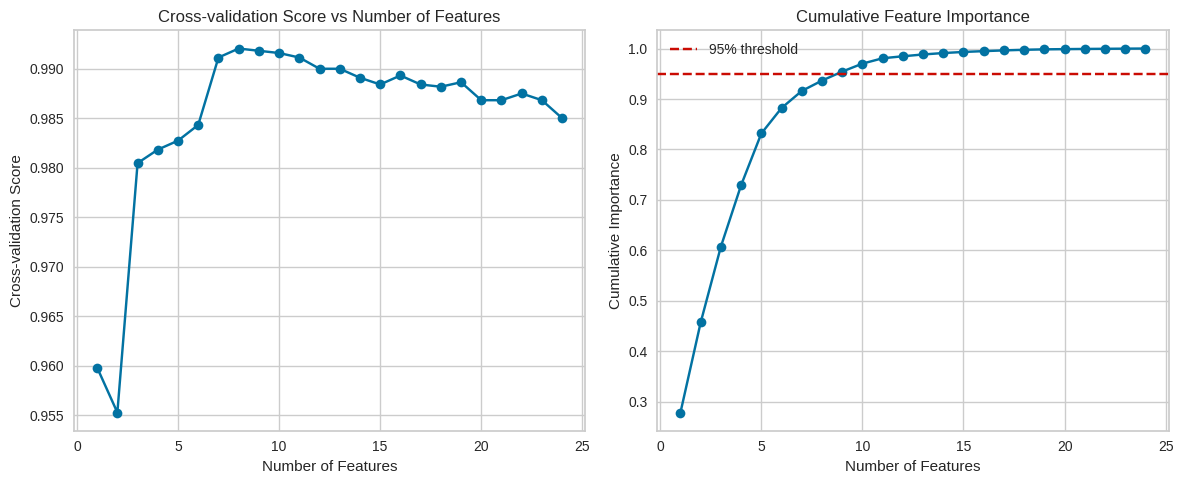

Optimal k based on CV score: 8
Optimal k based on 95% importance: 9
Maximum CV score: 0.992

Feature Importance Ranking:
                                              Feature       Score
1                                            smt_rank  162.666316
4                                user_weight_category  104.131997
2                                         smt_avg_spd   87.694102
21                                       attempt_year   71.036565
6                                         act_avg_spd   59.759770
13                smt_name_Headquarters Business Park   29.457332
0                                      user_age_group   19.711867
3                                  smt_finish_seconds   11.978274
8                                        act_total_km   10.423123
18         smt_name_PRINCE SULTAN - ASSALAM TO FATIMA    9.198917
7                                         act_max_spd    6.209231
17                       smt_name_Oghor 2 SailsIsland    2.288354
14                   

In [521]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Cari k optimal
def find_optimal_k(X_train_scaled, y_train, max_features=None):
    if max_features is None:
        max_features = X_train_scaled.shape[1]

    k_range = range(1, max_features + 1)
    scores = []
    cv_scores = []

    for k in k_range:
        # Feature selection
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(X_train_scaled, y_train)

        # Evaluasi dengan cross validation
        clf = RandomForestClassifier(random_state=42, n_jobs=-1)
        cv_score = cross_val_score(clf, X_selected, y_train, cv=5).mean()
        cv_scores.append(cv_score)

        scores.append(selector.scores_)

    # Plot hasil
    plt.figure(figsize=(12, 5))

    # Plot 1: CV Scores
    plt.subplot(1, 2, 1)
    plt.plot(k_range, cv_scores, marker='o')
    plt.xlabel('Number of Features')
    plt.ylabel('Cross-validation Score')
    plt.title('Cross-validation Score vs Number of Features')

    # Plot 2: Cumulative Feature Importance
    plt.subplot(1, 2, 2)
    cumulative_importance = np.cumsum(np.sort(scores[0])[::-1]) / np.sum(scores[0])
    plt.plot(k_range, cumulative_importance, marker='o')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.title('Cumulative Feature Importance')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Menemukan k yang paling optimal
    k_optimal_cv = k_range[np.argmax(cv_scores)]
    k_optimal_95 = np.where(cumulative_importance >= 0.95)[0][0] + 1

    print(f"Optimal k based on CV score: {k_optimal_cv}")
    print(f"Optimal k based on 95% importance: {k_optimal_95}")
    print(f"Maximum CV score: {max(cv_scores):.3f}")

    # Feature importance ranking
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(X_train_scaled, y_train)
    feature_scores = pd.DataFrame({
        'Feature': X_train.columns,
        'Score': selector.scores_
    }).sort_values('Score', ascending=False)

    print("\nFeature Importance Ranking:")
    print(feature_scores)

    return k_optimal_cv, feature_scores

k_optimal, feature_scores = find_optimal_k(X_train_scaled, y_train)


##### *Handle Imbalanced Data*

In [522]:
# Periksa imbalanced data
class_counts = df_rf['gender'].value_counts()
imbalance_ratio = class_counts.min() / class_counts.max()

print(f"Rasio kelas minoritas terhadap mayoritas: {imbalance_ratio:.2f}")

Rasio kelas minoritas terhadap mayoritas: 0.04


Karena rasio sangat jauh dari 1, maka datanya bisa dianggap *imbalanced*.

In [523]:
# Setelah mendapatkan k optimal, buat pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImblearnPipeline
from imblearn.over_sampling import ADASYN

# Pipeline dengan k optimal
pipeline = ImblearnPipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=k_optimal)),
    ('sampler', ADASYN(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('selector', SelectKBest(k=8)),
                ('sampler', ADASYN(random_state=42)),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

##### *Fit Pipeline*

In [524]:
# Fit dan evaluasi pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

#### Hasil Evaluasi Model

In [525]:
from sklearn.metrics import precision_score,recall_score, classification_report,accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Berikut adalah informasi lengkap tentang performa model : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

evaluate_classifier_performance(y_pred,y_val)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.95      0.92      0.93        76
           2       1.00      1.00      1.00      1812

    accuracy                           0.99      1888
   macro avg       0.97      0.96      0.97      1888
weighted avg       0.99      0.99      0.99      1888



Confusion Matrix



prediction   1     2
actual              
1           70     6
2            4  1808



Berikut adalah informasi lengkap tentang performa model : 
Accuracy Average: 0.9947033898305084
F1 Macro Average: 0.9652877367163082
F1 Micro Average: 0.9947033898305084
Precision Macro Average: 0.9713191692243511
Precision Micro Average: 0.9947033898305084
Recall Macro Average: 0.9594225630300918
Recall Micro Average: 0.9947033898305084



#### Test Data

##### Load and Process data

In [526]:
test_data = pd.read_csv("https://drive.google.com/uc?id=1qPBRTfLz4wPgirhCcROaicQk0SDfeH9C")

id_test = test_data['id'].copy()
test_data.drop(["id", "user_id"], axis=1, inplace=True)

##### Check missing values

In [527]:
# Cek missing values awal
print("Missing values before:")
print(test_data.isnull().sum())

Missing values before:
user_age_group           0
attempt_date             0
smt_rank                 0
smt_avg_spd              0
smt_finish_seconds       0
smt_name                 0
user_weight_category    36
act_title                0
act_avg_spd              0
act_max_spd              0
act_total_km             0
act_moving_seconds       0
act_total_seconds        0
has_hr_data              0
dtype: int64


In [528]:
mode_value = test_data['user_weight_category'].mode()[0]
test_data['user_weight_category'] = test_data['user_weight_category'].fillna(mode_value)


##### *Data Encoding*

In [529]:
# 1. Mapping User Age Group
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}
test_data['user_age_group'] = test_data['user_age_group'].map(age_mapping)
test_data.head()

user_age_group attempt_date  smt_rank  ...  act_moving_seconds  act_total_seconds has_hr_data
0               2   2018-03-12       112  ...                7128               7128           0
1               3   2016-11-02       190  ...                6338               6338           0
2               3   2018-06-22        55  ...               16202              16202           0
3               3   2015-01-31       222  ...                3787               3787           0
4               3   2014-10-21       278  ...                4699               4699           0

[5 rows x 14 columns]

In [530]:
# 2. Mapping User Weight Category
weight_mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}
test_data['user_weight_category'] = test_data['user_weight_category'].map(weight_mapping)

In [531]:
# 3. Mapping Segment Name
test_data = pd.get_dummies(test_data, columns=['smt_name'], drop_first=False)
test_data

user_age_group  ... smt_name_Starbucks to Majid
0                 2  ...                        True
1                 3  ...                       False
2                 3  ...                       False
3                 3  ...                        True
4                 3  ...                       False
..              ...  ...                         ...
781               4  ...                        True
782               2  ...                       False
783               3  ...                       False
784               0  ...                       False
785               1  ...                       False

[786 rows x 22 columns]

In [532]:
# 4. Frequency Encoding untuk act_title
freq_map = test_data['act_title'].value_counts(normalize=True)
test_data['act_title'] = test_data['act_title'].map(freq_map)

In [533]:
# 5. Encoding attempt_date
test_data['attempt_date'] = pd.to_datetime(test_data['attempt_date'])
test_data['attempt_year'] = test_data['attempt_date'].dt.year
test_data['attempt_month'] = test_data['attempt_date'].dt.month
test_data['attempt_day'] = test_data['attempt_date'].dt.day
test_data = test_data.drop('attempt_date', axis=1)

In [534]:
test_data.isnull().sum()

user_age_group                                         0
smt_rank                                               0
smt_avg_spd                                            0
smt_finish_seconds                                     0
user_weight_category                                   0
act_title                                              0
act_avg_spd                                            0
act_max_spd                                            0
act_total_km                                           0
act_moving_seconds                                     0
act_total_seconds                                      0
has_hr_data                                            0
smt_name_Al Fardoos to shellfish round about           0
smt_name_Headquarters Business Park                    0
smt_name_King Street side                              0
smt_name_North Corniche                                0
smt_name_Obhur North Short                             0
smt_name_Oghor 2 SailsIsland                           0
smt_name_PRINCE SULTAN - ASSALAM TO FATIMA             0
smt_name_S.Ubhur Alkurnaysh South Bound with detour    0
smt_name_Starbucks to Majid                            0
attempt_year                                           0
attempt_month                                          0
attempt_day                                            0
dtype: int64

##### Predict data test

In [535]:
test_predictions = pipeline.predict(test_data)

# Membuat file untuk submission kaggle
submission = pd.DataFrame({
'id': id_test,  # Gunakan id yang sudah disimpan
'gender': test_predictions
})

submission.to_csv('CSL_Submission_RF.csv', index=False)
submission

id  gender
0     265       2
1    2473       2
2    1835       2
3     865       2
4    7404       2
..    ...     ...
781  1055       2
782  3322       2
783  5652       2
784  3131       2
785  1454       1

[786 rows x 2 columns]

In [536]:
unique_values = submission['gender'].value_counts()

print(unique_values)

gender
2    751
1     35
Name: count, dtype: int64


## Random Forest with Hypertuning

#### Proses modelling

In [537]:
df_rf_tuning = df_rf.copy()
df_rf_tuning

user_age_group  gender  smt_rank  ...  attempt_year  attempt_month  attempt_day
0                  2       2       712  ...          2017             12           22
1                  2       2       189  ...          2015              4           13
2                  2       2       264  ...          2018              2            7
3                  2       2        50  ...          2018              8           24
4                  2       1        19  ...          2020              3            6
...              ...     ...       ...  ...           ...            ...          ...
6287               2       2       431  ...          2018              7           16
6288               3       2        34  ...          2018             11           21
6289               3       2       218  ...          2013              8           11
6290               3       2       477  ...          2015              4           24
6291               3       2       142  ...          2019              4           25

[6292 rows x 25 columns]

In [538]:
X = df_rf_tuning.drop(columns=['gender'])
y = df_rf_tuning['gender']

In [539]:
X_tuning_train, X_tuning_val, y_tuning_train, y_tuning_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [540]:
scaler =  StandardScaler()
X_tuning_train_scaled = scaler.fit_transform(X_tuning_train)
X_tuning_val_scaled = scaler.transform(X_tuning_val)

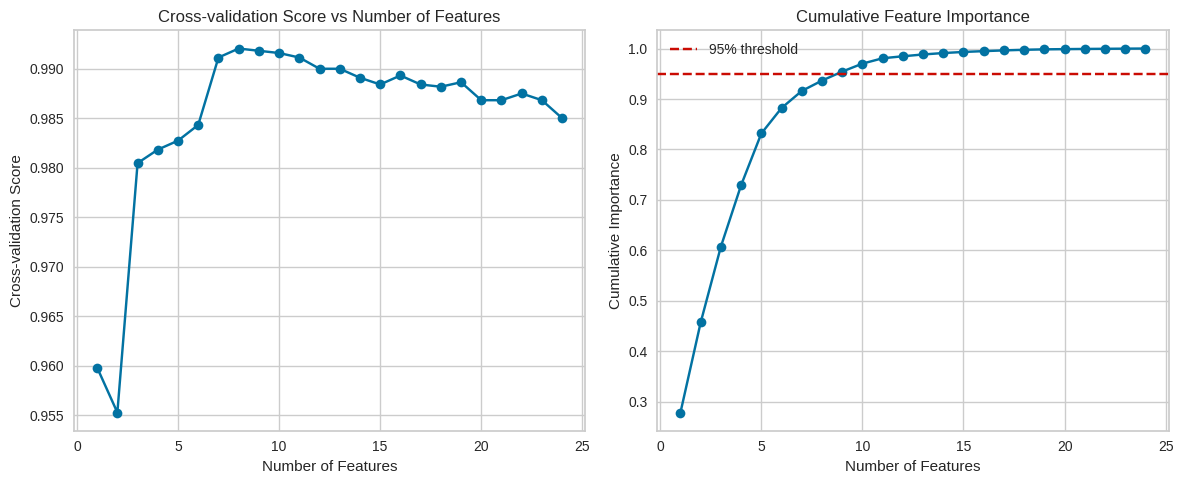

Optimal k based on CV score: 8
Optimal k based on 95% importance: 9
Maximum CV score: 0.992

Feature Importance Ranking:
                                              Feature       Score
1                                            smt_rank  162.666316
4                                user_weight_category  104.131997
2                                         smt_avg_spd   87.694102
21                                       attempt_year   71.036565
6                                         act_avg_spd   59.759770
13                smt_name_Headquarters Business Park   29.457332
0                                      user_age_group   19.711867
3                                  smt_finish_seconds   11.978274
8                                        act_total_km   10.423123
18         smt_name_PRINCE SULTAN - ASSALAM TO FATIMA    9.198917
7                                         act_max_spd    6.209231
17                       smt_name_Oghor 2 SailsIsland    2.288354
14                   

In [541]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Cari k optimal
def find_optimal_k(X_train_scaled, y_train, max_features=None):
    if max_features is None:
        max_features = X_train_scaled.shape[1]

    k_range = range(1, max_features + 1)
    scores = []
    cv_scores = []

    for k in k_range:
        # Feature selection
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(X_train_scaled, y_train)

        # Evaluasi dengan cross validation
        clf = RandomForestClassifier(random_state=42, n_jobs=-1)
        cv_score = cross_val_score(clf, X_selected, y_train, cv=5).mean()
        cv_scores.append(cv_score)

        scores.append(selector.scores_)

    # Plot hasil
    plt.figure(figsize=(12, 5))

    # Plot 1: CV Scores
    plt.subplot(1, 2, 1)
    plt.plot(k_range, cv_scores, marker='o')
    plt.xlabel('Number of Features')
    plt.ylabel('Cross-validation Score')
    plt.title('Cross-validation Score vs Number of Features')

    # Plot 2: Cumulative Feature Importance
    plt.subplot(1, 2, 2)
    cumulative_importance = np.cumsum(np.sort(scores[0])[::-1]) / np.sum(scores[0])
    plt.plot(k_range, cumulative_importance, marker='o')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.title('Cumulative Feature Importance')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Menemukan k yang paling optimal
    k_optimal_cv = k_range[np.argmax(cv_scores)]
    k_optimal_95 = np.where(cumulative_importance >= 0.95)[0][0] + 1

    print(f"Optimal k based on CV score: {k_optimal_cv}")
    print(f"Optimal k based on 95% importance: {k_optimal_95}")
    print(f"Maximum CV score: {max(cv_scores):.3f}")

    # Feature importance ranking
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(X_train_scaled, y_train)
    feature_scores = pd.DataFrame({
        'Feature': X_train.columns,
        'Score': selector.scores_
    }).sort_values('Score', ascending=False)

    print("\nFeature Importance Ranking:")
    print(feature_scores)

    return k_optimal_cv, feature_scores

k_optimal, feature_scores = find_optimal_k(X_tuning_train_scaled, y_tuning_train)

In [542]:
# Periksa imbalanced data
class_counts = df_rf_tuning['gender'].value_counts()
imbalance_ratio = class_counts.min() / class_counts.max()

print(f"Rasio kelas minoritas terhadap mayoritas: {imbalance_ratio:.2f}")

Rasio kelas minoritas terhadap mayoritas: 0.04


##### proses Hyperparameter tuning

In [543]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__max_depth': range(5, 45, 2),
    'classifier__min_samples_split': [3, 7, 12],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__class_weight': ['balanced']
}

In [544]:
from imblearn.over_sampling import ADASYN

pipeline = ImblearnPipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=k_optimal)),
    ('sampler', ADASYN(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('selector', SelectKBest(k=8)),
                ('sampler', ADASYN(random_state=42)),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [545]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_tuning_train, y_tuning_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selector', SelectKBest(k=8)),
                                       ('sampler', ADASYN(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced'],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': range(5, 45, 2),
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [3, 7, 12]},
             scoring='f1', verbose=1)

In [546]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 3}
Best cross-validation score: 0.90


In [547]:
best_pipeline = grid_search.best_estimator_
y_tuning_pred = best_pipeline.predict(X_tuning_val)

##### Evaluasi *performance*

In [548]:
evaluate_classifier_performance(y_tuning_pred,y_tuning_val)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        76
           2       1.00      1.00      1.00      1812

    accuracy                           0.99      1888
   macro avg       0.96      0.96      0.96      1888
weighted avg       0.99      0.99      0.99      1888



Confusion Matrix



prediction   1     2
actual              
1           70     6
2            6  1806



Berikut adalah informasi lengkap tentang performa model : 
Accuracy Average: 0.9936440677966102
F1 Macro Average: 0.9588706866504009
F1 Micro Average: 0.9936440677966102
Precision Macro Average: 0.9588706866504009
Precision Micro Average: 0.9936440677966102
Recall Macro Average: 0.9588706866504009
Recall Micro Average: 0.9936440677966102



#### Test data

##### Load and Process data

In [549]:
test_data_hyp = pd.read_csv("https://drive.google.com/uc?id=1qPBRTfLz4wPgirhCcROaicQk0SDfeH9C")

id_test = test_data_hyp['id'].copy()
test_data_hyp.drop(["id", "user_id"], axis=1, inplace=True)

##### Periksa *Missing Values*

In [550]:
# Cek missing values awal
print("Missing values before:")
print(test_data_hyp.isnull().sum())

Missing values before:
user_age_group           0
attempt_date             0
smt_rank                 0
smt_avg_spd              0
smt_finish_seconds       0
smt_name                 0
user_weight_category    36
act_title                0
act_avg_spd              0
act_max_spd              0
act_total_km             0
act_moving_seconds       0
act_total_seconds        0
has_hr_data              0
dtype: int64


In [551]:
mode_value = test_data_hyp['user_weight_category'].mode()[0]
test_data_hyp['user_weight_category'] = test_data_hyp['user_weight_category'].fillna(mode_value)

##### Encode data

In [552]:
# Mapping User Age Group
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}
test_data_hyp['user_age_group'] = test_data_hyp['user_age_group'].map(age_mapping)
test_data_hyp.head()

user_age_group attempt_date  smt_rank  ...  act_moving_seconds  act_total_seconds has_hr_data
0               2   2018-03-12       112  ...                7128               7128           0
1               3   2016-11-02       190  ...                6338               6338           0
2               3   2018-06-22        55  ...               16202              16202           0
3               3   2015-01-31       222  ...                3787               3787           0
4               3   2014-10-21       278  ...                4699               4699           0

[5 rows x 14 columns]

In [553]:
# Mapping User Weight Category
weight_mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}
test_data_hyp['user_weight_category'] = test_data_hyp['user_weight_category'].map(weight_mapping)

In [554]:
# Mapping Segment Name
test_data_hyp = pd.get_dummies(test_data_hyp, columns=['smt_name'], drop_first=False)
test_data_hyp

user_age_group  ... smt_name_Starbucks to Majid
0                 2  ...                        True
1                 3  ...                       False
2                 3  ...                       False
3                 3  ...                        True
4                 3  ...                       False
..              ...  ...                         ...
781               4  ...                        True
782               2  ...                       False
783               3  ...                       False
784               0  ...                       False
785               1  ...                       False

[786 rows x 22 columns]

In [555]:
# Frequency Encoding untuk act_title
freq_map = test_data_hyp['act_title'].value_counts(normalize=True)
test_data_hyp['act_title'] = test_data_hyp['act_title'].map(freq_map)

In [556]:
# Encoding attempt_date
test_data_hyp['attempt_date'] = pd.to_datetime(test_data_hyp['attempt_date'])
test_data_hyp['attempt_year'] = test_data_hyp['attempt_date'].dt.year
test_data_hyp['attempt_month'] = test_data_hyp['attempt_date'].dt.month
test_data_hyp['attempt_day'] = test_data_hyp['attempt_date'].dt.day
test_data_hyp = test_data_hyp.drop('attempt_date', axis=1)

In [557]:
test_data_hyp.isnull().sum()

user_age_group                                         0
smt_rank                                               0
smt_avg_spd                                            0
smt_finish_seconds                                     0
user_weight_category                                   0
act_title                                              0
act_avg_spd                                            0
act_max_spd                                            0
act_total_km                                           0
act_moving_seconds                                     0
act_total_seconds                                      0
has_hr_data                                            0
smt_name_Al Fardoos to shellfish round about           0
smt_name_Headquarters Business Park                    0
smt_name_King Street side                              0
smt_name_North Corniche                                0
smt_name_Obhur North Short                             0
smt_name_Oghor 2 SailsIsland                           0
smt_name_PRINCE SULTAN - ASSALAM TO FATIMA             0
smt_name_S.Ubhur Alkurnaysh South Bound with detour    0
smt_name_Starbucks to Majid                            0
attempt_year                                           0
attempt_month                                          0
attempt_day                                            0
dtype: int64

##### Predict data test

In [558]:
test_hyp_predictions = best_pipeline.predict(test_data_hyp)

# Membuat file untuk submission kaggle
submission = pd.DataFrame({
'id': id_test,  # Gunakan id yang sudah disimpan
'gender': test_hyp_predictions
})

submission.to_csv('CSL_Submission_RF-Tuning.csv', index=False)
submission

id  gender
0     265       2
1    2473       2
2    1835       2
3     865       2
4    7404       2
..    ...     ...
781  1055       2
782  3322       2
783  5652       2
784  3131       2
785  1454       1

[786 rows x 2 columns]

## Linear Regression

#### Proses *Modelling*

In [559]:
df_linreg = df_rf.copy()
df_linreg

user_age_group  gender  smt_rank  ...  attempt_year  attempt_month  attempt_day
0                  2       2       712  ...          2017             12           22
1                  2       2       189  ...          2015              4           13
2                  2       2       264  ...          2018              2            7
3                  2       2        50  ...          2018              8           24
4                  2       1        19  ...          2020              3            6
...              ...     ...       ...  ...           ...            ...          ...
6287               2       2       431  ...          2018              7           16
6288               3       2        34  ...          2018             11           21
6289               3       2       218  ...          2013              8           11
6290               3       2       477  ...          2015              4           24
6291               3       2       142  ...          2019              4           25

[6292 rows x 25 columns]

##### *Handle Outliers*

In [560]:
def hitung_outlier(df) :
    outliers_dict = {}
    outliers_percentage_dict = {}

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.select_dtypes(include=numerics) :
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        outliers = df[col][
            (df[col] > q3 + 1.5 * iqr) |
            (df[col] < q1 - 1.5 * iqr)
        ]
        outliers_dict[col] = len(outliers)
        outliers_percentage_dict[col] = (len(outliers) / len(df)) * 100

    outliers_values = tuple(outliers_dict.values())
    outliers_percentage_values = tuple(outliers_percentage_dict.values())

    outliers_df = pd.DataFrame([outliers_values, outliers_percentage_values],
                            columns=list(outliers_dict.keys()),
                            index=['Outliers count', 'Outliers percentage (%)'])
    display(outliers_df)

In [561]:
# Periksa outlier
hitung_outlier(df_linreg)

user_age_group      gender  ...  attempt_month  attempt_day
Outliers count               483.000000  253.000000  ...            0.0          0.0
Outliers percentage (%)        7.676414    4.020979  ...            0.0          0.0

[2 rows x 16 columns]

<Axes: >

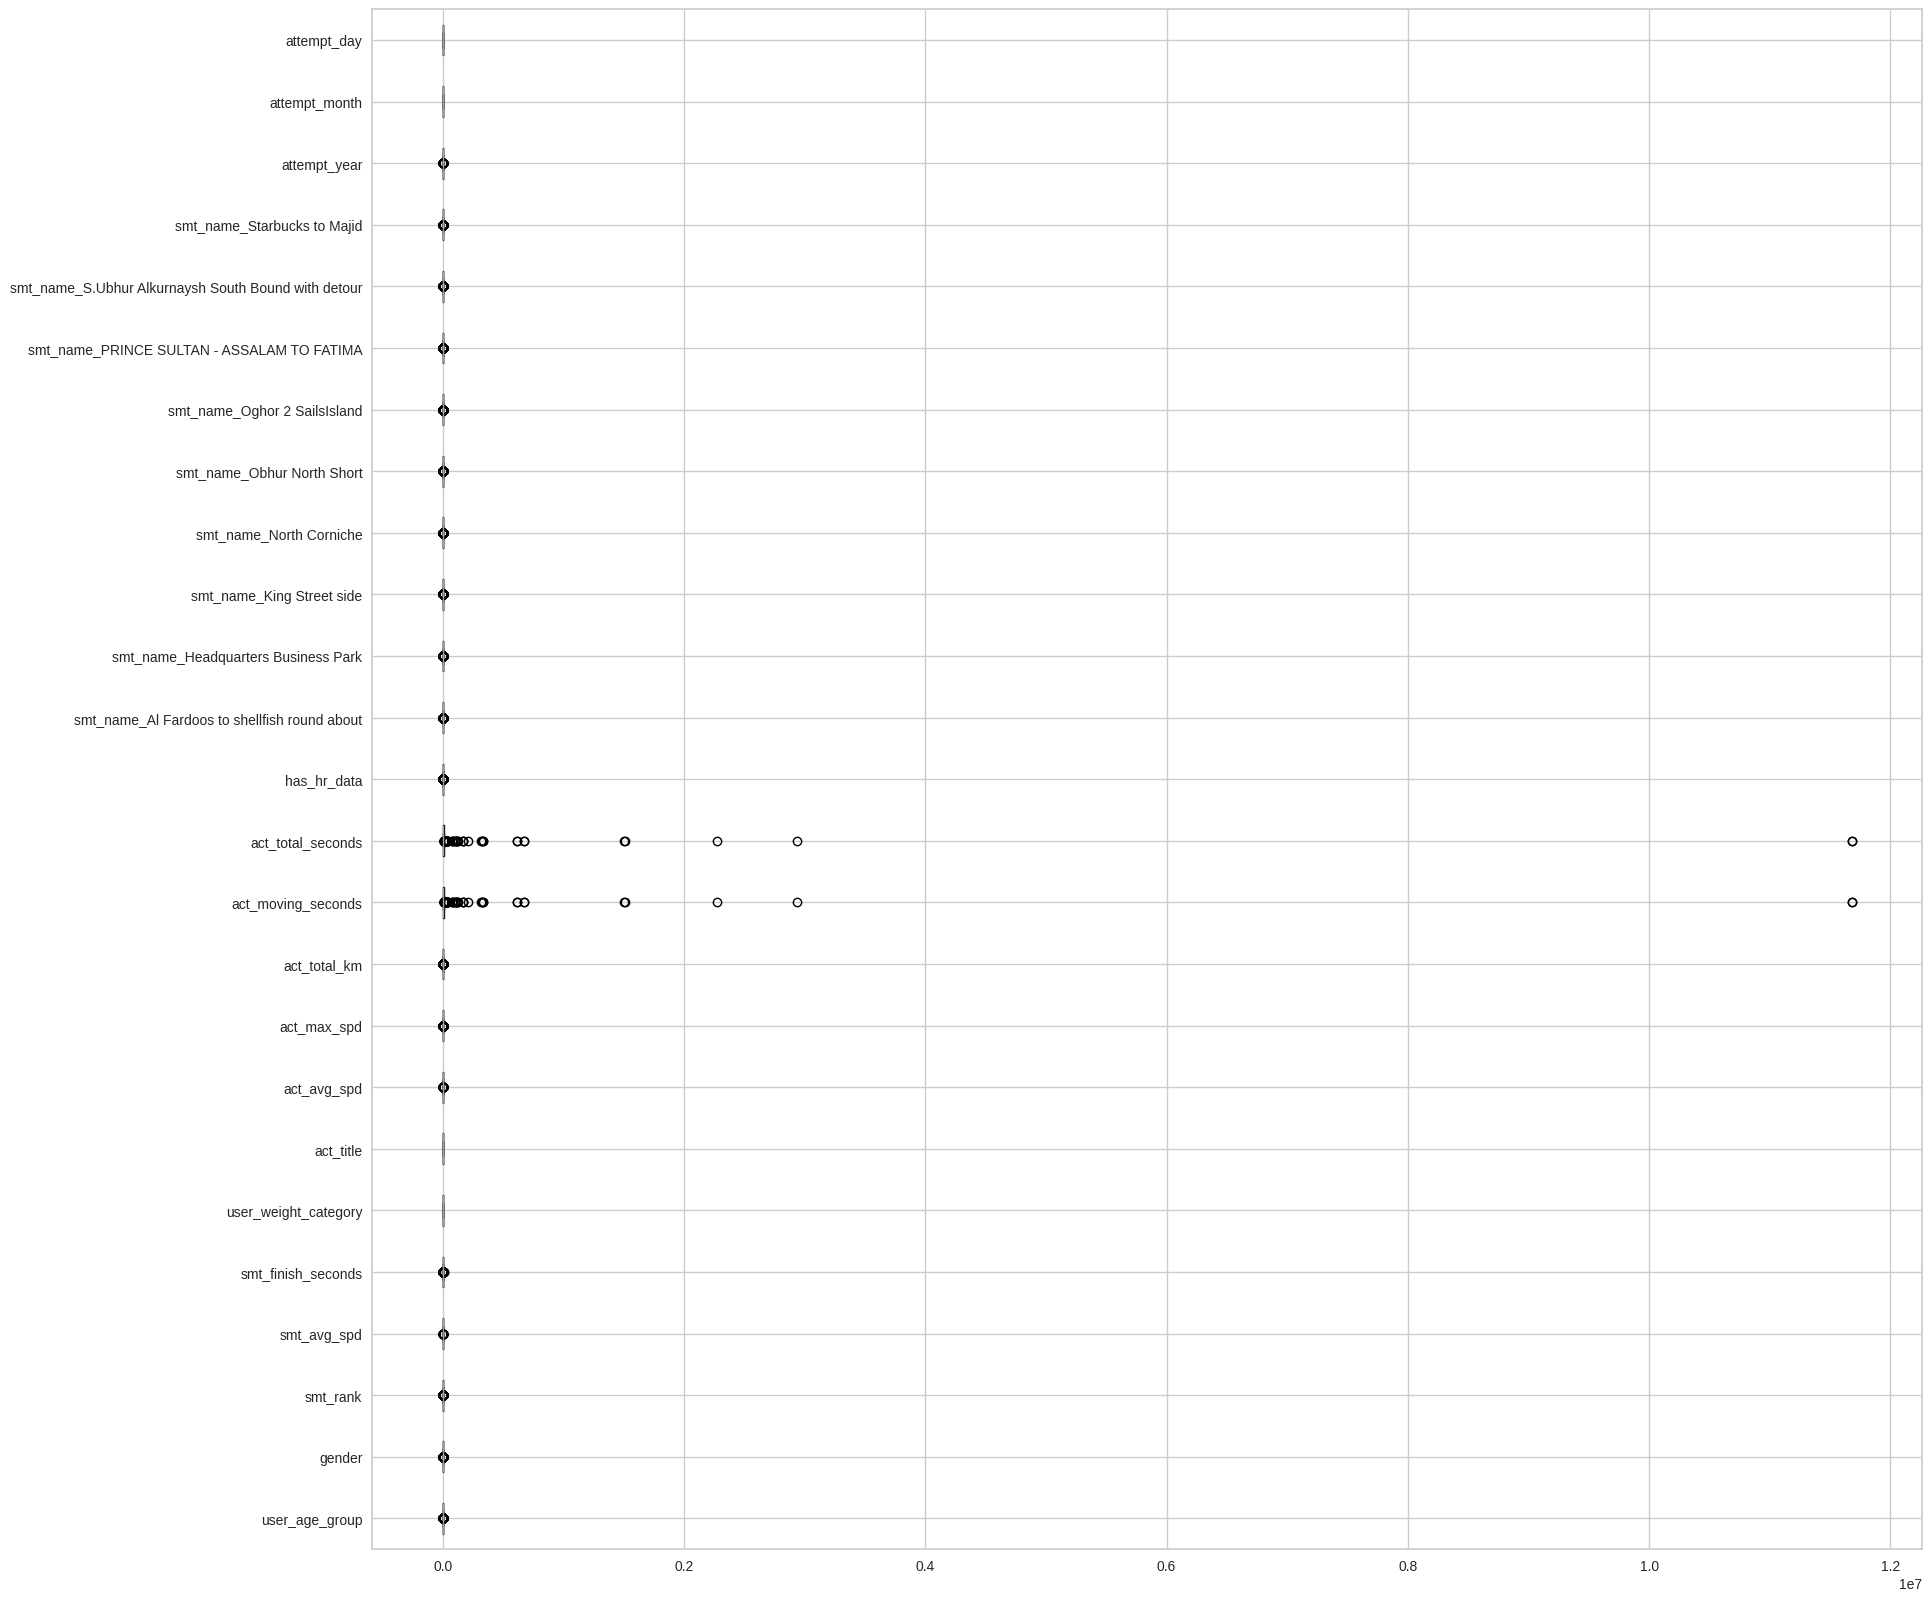

In [562]:
df_linreg.boxplot(vert=False, figsize=(20,20))

In [563]:
# Hapus outlier yang tak wajar
def hapus_outliers_tertinggi(df, col, percentage=25):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1

    outliers = df[col] > (q3 + 1.5 * iqr)
    outliers_index = df[outliers].index

    # Ambil 25% nilai tertinggi di antara outliers
    outliers_values = df.loc[outliers_index, col].sort_values(ascending=False)
    n_remove = int(len(outliers_values) * (percentage / 100))
    to_remove = outliers_values.head(n_remove).index

    return df.drop(index=to_remove)

df_linreg = hapus_outliers_tertinggi(df_linreg, 'act_total_seconds', percentage=25)
df_linreg = hapus_outliers_tertinggi(df_linreg, 'act_moving_seconds', percentage=25)
df_linreg = hapus_outliers_tertinggi(df_linreg, 'smt_finish_seconds', percentage=25)
df_linreg = hapus_outliers_tertinggi(df_linreg, 'act_max_spd', percentage=25)

In [564]:
# Periksa outlier
hitung_outlier(df_linreg)

user_age_group      gender  ...  attempt_month  attempt_day
Outliers count               452.000000  238.000000  ...            0.0          0.0
Outliers percentage (%)        7.514547    3.956775  ...            0.0          0.0

[2 rows x 16 columns]

<Axes: >

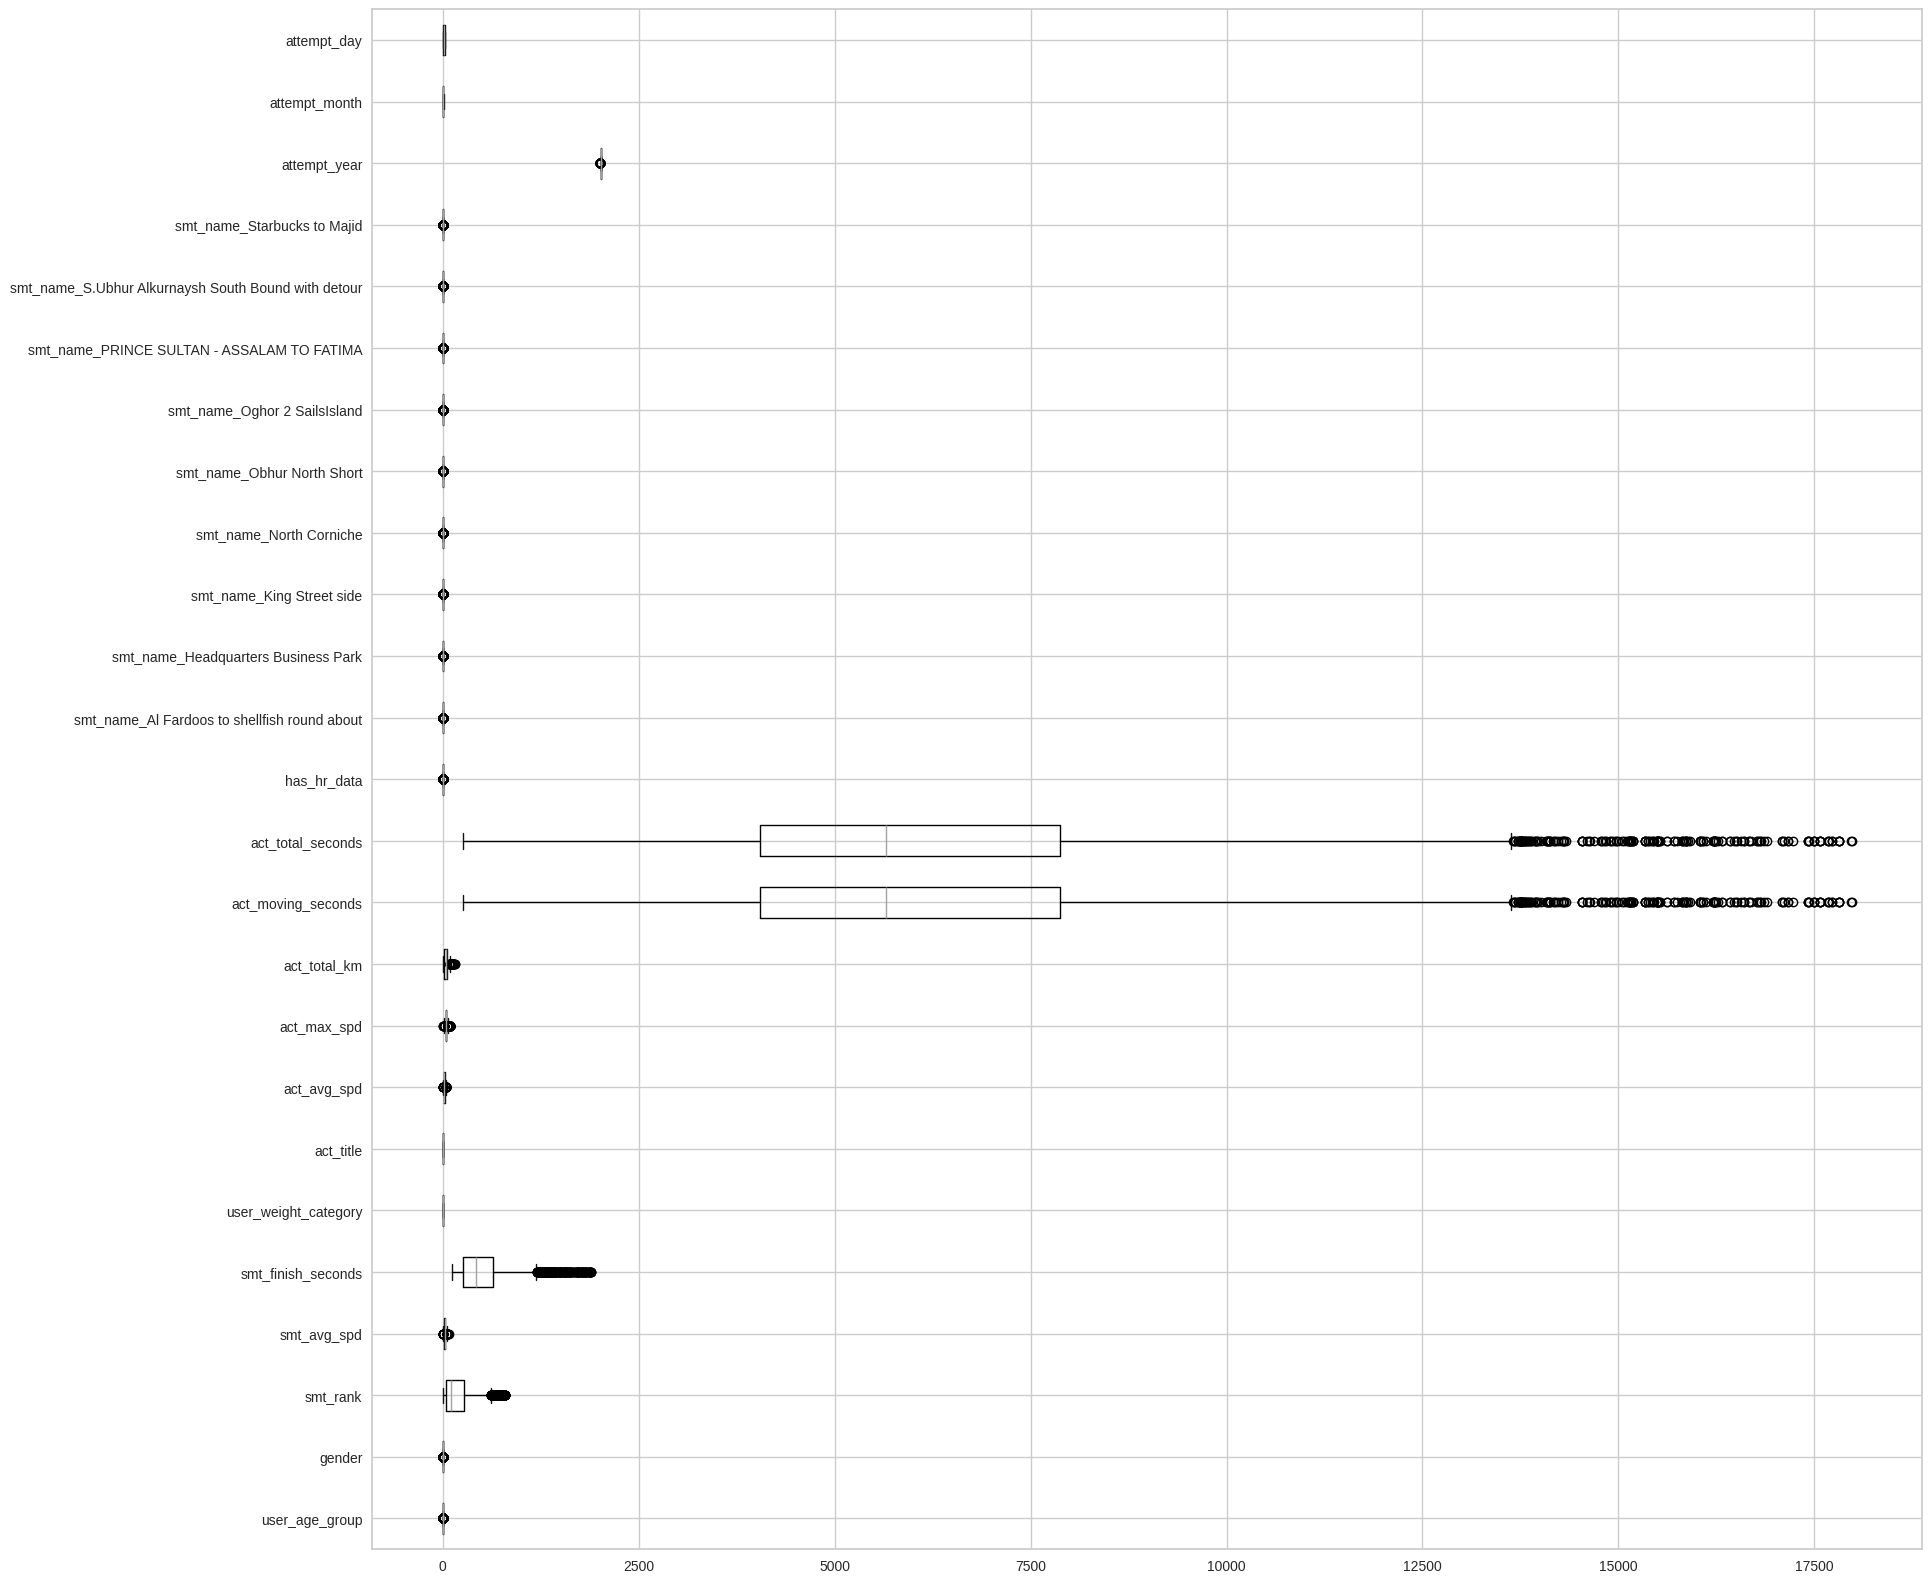

In [565]:
df_linreg.boxplot(vert=False, figsize=(20,20))

##### Persiapan *Modelling*

In [566]:
# Drop target feature
X_linreg = df_linreg.drop(columns=['smt_finish_seconds'])
y_linreg = df_linreg['smt_finish_seconds']

In [567]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train_linreg, X_test_linreg, y_train_linreg, y_test_linreg = train_test_split(X_linreg, y_linreg, test_size=0.3, random_state=42)

##### Standarisasi

Saya memilih untuk menggunakan `RobustScaler` karena metode ini mengurangi pengaruh *outliers* dengan menskalakan data berdasarkan median dan rentang interkuartil (IQR). Pendekatan ini memastikan bahwa skala fitur lebih stabil dan tidak terdistorsi oleh nilai yang jauh dari mayoritas data, sehingga model *linear regression* dapat bekerja lebih efektif dan memberikan hasil yang lebih akurat.

In [568]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Melakukan standarisasi (pake RobustScaler)
scaler = RobustScaler()

X_train_linreg[X_train_linreg.columns] = scaler.fit_transform(X_train_linreg) # Standarisasi data training
X_test_linreg[X_test_linreg.columns]  = scaler.transform(X_test_linreg) # Standarisasi data testing

##### *Training* Model

In [569]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_linreg, y_train_linreg)

y_pred_linreg = linreg.predict(X_test_linreg)
y_pred_linreg

array([297.88709477, 377.54508659, 414.73743894, ..., 326.62513183,
       362.04821687, 398.66135911])

In [570]:
X_train_linreg

user_age_group  gender  smt_rank  ...  attempt_year  attempt_month  attempt_day
3407             0.0     0.0 -0.195652  ...           0.5      -0.571429       0.6875
45              -2.0     0.0 -0.400000  ...           0.0       0.428571      -0.6875
1325             0.0     0.0  1.495652  ...           0.0       0.142857       0.4375
1151             1.0     0.0  0.573913  ...           0.0       0.571429       0.6250
1523             1.0     0.0 -0.260870  ...           0.0      -0.857143      -0.1250
...              ...     ...       ...  ...           ...            ...          ...
3941             1.0     0.0 -0.404348  ...           0.5       0.714286       0.2500
5437             0.0     0.0  0.013043  ...           0.5       0.000000       0.2500
5474             2.0     0.0 -0.386957  ...          -1.5       0.428571      -0.8125
5644            -2.0     0.0 -0.434783  ...           0.5       0.714286       0.6875
904             -1.0     0.0 -0.226087  ...           0.5      -0.428571       0.6250

[4210 rows x 24 columns]

##### Evaluasi Model

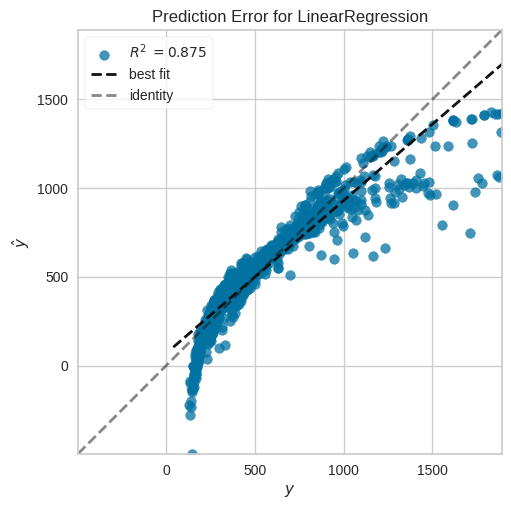

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [571]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

# Visualisasi
visualizer = PredictionError(linreg)

visualizer.fit(X_train_linreg, y_train_linreg)
visualizer.score(X_test_linreg, y_test_linreg)
visualizer.show()

Dari visualisasi tersebut, dapat dilihat bahwa model memiliki performa yang cukup baik dengan R² = 0.875. Namun, masih terdapat penyimpangan pada nilai-nilai target yang lebih tinggi, di mana prediksi cenderung kurang akurat. *Garis identity* menunjukkan bahwa prediksi secara umum mengikuti pola target, tetapi deviasi pada ujung kurva mengindikasikan bahwa model linier mungkin kurang fleksibel untuk menangkap kompleksitas hubungan antara fitur dan jumlah detik yang dibutuhkan untuk menyelesaikan lintasan pada segmen tertentu.

In [572]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test_linreg, y_pred_linreg)
mse = mean_squared_error(y_test_linreg, y_pred_linreg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_linreg, y_pred_linreg)

# Menampilkan hasil
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 65.0244
Mean Squared Error (MSE): 11505.0933
Root Mean Squared Error (RMSE): 107.2618
R-squared (R²): 0.8745


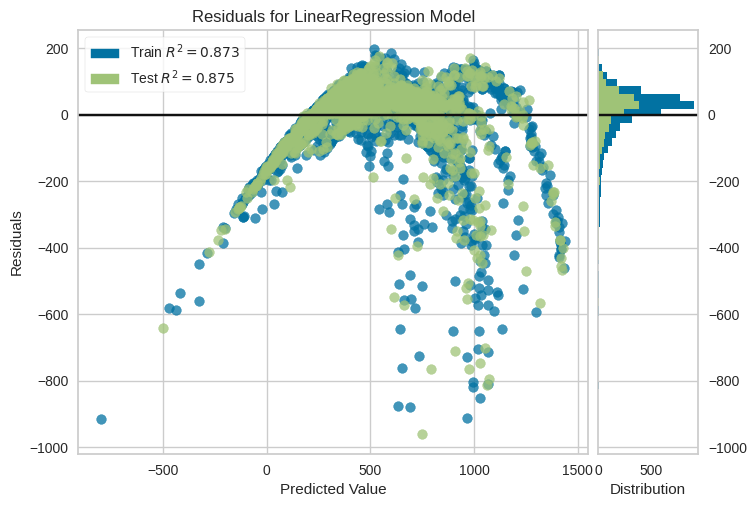

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [573]:
# Visualisasi menggunakan residual plot
visualizer = ResidualsPlot(linreg)

visualizer.fit(X_train_linreg, y_train_linreg)
visualizer.score(X_test_linreg, y_test_linreg)
visualizer.show()

Grafik residual untuk Linear regression menunjukkan pola penyebaran yang tidak sepenuhnya acak di sekitar garis nol, dengan sebagian besar residual terkonsentrasi di dekat nol tetapi membentuk pola melengkung yang mengindikasikan hubungan *non-linear* yang tidak ditangkap model. Nilai R² untuk data *training* (0,873) dan *testing* (0,875) sangat konsisten, menunjukkan performa model yang serupa pada kedua *dataset*. Namun, pola residual dan beberapa outlier besar mengindikasikan bahwa model belum sepenuhnya mampu menangkap kompleksitas hubungan antara fitur dan target.

*Cross validation*

In [574]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(linreg, X_train_linreg, y_train_linreg, cv=kf, scoring='r2')

print('Cross-validation scores:')
for i, score in enumerate(scores, start=1):
    print(f"Iterasi {i} = {score:.4f}")

print('')
print('Mean cross-validation score:', scores.mean())

Cross-validation scores:
Iterasi 1 = 0.8345
Iterasi 2 = 0.8830
Iterasi 3 = 0.8730
Iterasi 4 = 0.8730
Iterasi 5 = 0.8871

Mean cross-validation score: 0.8701159841607945


##### Fitur yang paling berpengaruh

In [575]:
# Mendapatkan koefisien dari model yang sudah dilatih
coefficients = linreg.coef_

feature_importance = pd.DataFrame({
    'Feature': X_train_linreg.columns,
    'Coefficient': coefficients
})

# Mengurutkan fitur berdasarkan nilai absolut koefisien
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Fitur yang paling berpengaruh terhadap prediksi:")
print(feature_importance)

Fitur yang paling berpengaruh terhadap prediksi:
                                              Feature  Coefficient  Abs_Coefficient
19  smt_name_S.Ubhur Alkurnaysh South Bound with d...   522.832281       522.832281
13                smt_name_Headquarters Business Park  -453.499228       453.499228
17                       smt_name_Oghor 2 SailsIsland  -338.276365       338.276365
12       smt_name_Al Fardoos to shellfish round about   315.958599       315.958599
16                         smt_name_Obhur North Short   270.829605       270.829605
3                                         smt_avg_spd  -260.432140       260.432140
18         smt_name_PRINCE SULTAN - ASSALAM TO FATIMA  -251.234890       251.234890
20                        smt_name_Starbucks to Majid   -98.828815        98.828815
8                                        act_total_km   -79.968607        79.968607
6                                         act_avg_spd    42.966108        42.966108
9                          

#### *Test* Data

##### *Load and Process data*

In [576]:
test_data_linreg = pd.read_csv("https://drive.google.com/uc?id=1aKPCzUk-U1mOvYiMxuUfa_M2TDu_TMXq")

id_test = test_data_linreg['id'].copy()
test_data_linreg.drop(["id", "user_id"], axis=1, inplace=True)

##### Periksa *Missing Values*

In [577]:
# Cek missing values awal
print("Missing values before:")
print(test_data_linreg.isnull().sum())

Missing values before:
user_age_group           0
attempt_date             0
smt_rank                 0
smt_avg_spd              0
smt_name                 0
user_weight_category    39
act_title                0
act_avg_spd              0
act_max_spd              0
act_total_km             0
act_moving_seconds       0
act_total_seconds        0
has_hr_data              0
gender                   0
dtype: int64


In [578]:
mode_value = test_data_linreg['user_weight_category'].mode()[0]
test_data_linreg['user_weight_category'] = test_data_linreg['user_weight_category'].fillna(mode_value)

##### *Data Encoding*

In [579]:
# Mapping User Age Group
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}
test_data_linreg['user_age_group'] = test_data_linreg['user_age_group'].map(age_mapping)
test_data_linreg

user_age_group attempt_date  smt_rank  ...  act_total_seconds has_hr_data gender
0                 2   2018-07-15        33  ...               4326           0   male
1                 2   2018-01-03       181  ...               6427           0   male
2                 2   2019-07-19         3  ...              12507           0   male
3                 4   2018-06-22       142  ...               6254           0   male
4                 3   2018-08-29       216  ...               9398           0   male
..              ...          ...       ...  ...                ...         ...    ...
782               2   2018-05-17        60  ...               8151           0   male
783               3   2018-07-16       221  ...               9187           0   male
784               3   2015-12-07       401  ...               9959           0   male
785               2   2017-05-10       184  ...               4913           0   male
786               3   2016-04-11       336  ...               2158           0   male

[787 rows x 14 columns]

In [580]:
# Mapping Gender
gender_mapping = {
    'male': 2,
    'female': 1
}
test_data_linreg['gender'] = test_data_linreg['gender'].map(gender_mapping)
test_data_linreg

user_age_group attempt_date  smt_rank  ...  act_total_seconds has_hr_data gender
0                 2   2018-07-15        33  ...               4326           0      2
1                 2   2018-01-03       181  ...               6427           0      2
2                 2   2019-07-19         3  ...              12507           0      2
3                 4   2018-06-22       142  ...               6254           0      2
4                 3   2018-08-29       216  ...               9398           0      2
..              ...          ...       ...  ...                ...         ...    ...
782               2   2018-05-17        60  ...               8151           0      2
783               3   2018-07-16       221  ...               9187           0      2
784               3   2015-12-07       401  ...               9959           0      2
785               2   2017-05-10       184  ...               4913           0      2
786               3   2016-04-11       336  ...               2158           0      2

[787 rows x 14 columns]

In [581]:
# Mapping User Weight Category
weight_mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}
test_data_linreg['user_weight_category'] = test_data_linreg['user_weight_category'].map(weight_mapping)
test_data_linreg

user_age_group attempt_date  smt_rank  ...  act_total_seconds has_hr_data  gender
0                 2   2018-07-15        33  ...               4326           0       2
1                 2   2018-01-03       181  ...               6427           0       2
2                 2   2019-07-19         3  ...              12507           0       2
3                 4   2018-06-22       142  ...               6254           0       2
4                 3   2018-08-29       216  ...               9398           0       2
..              ...          ...       ...  ...                ...         ...     ...
782               2   2018-05-17        60  ...               8151           0       2
783               3   2018-07-16       221  ...               9187           0       2
784               3   2015-12-07       401  ...               9959           0       2
785               2   2017-05-10       184  ...               4913           0       2
786               3   2016-04-11       336  ...               2158           0       2

[787 rows x 14 columns]

In [582]:
# Mapping Segment Name
test_data_linreg = pd.get_dummies(test_data_linreg, columns=['smt_name'], drop_first=False)
test_data_linreg

user_age_group  ... smt_name_Starbucks to Majid
0                 2  ...                       False
1                 2  ...                        True
2                 2  ...                       False
3                 4  ...                       False
4                 3  ...                        True
..              ...  ...                         ...
782               2  ...                       False
783               3  ...                       False
784               3  ...                       False
785               2  ...                       False
786               3  ...                       False

[787 rows x 22 columns]

In [583]:
# Frequency Encoding untuk act_title
freq_map = test_data_linreg['act_title'].value_counts(normalize=True)
test_data_linreg['act_title'] = test_data_linreg['act_title'].map(freq_map)
test_data_linreg

user_age_group  ... smt_name_Starbucks to Majid
0                 2  ...                       False
1                 2  ...                        True
2                 2  ...                       False
3                 4  ...                       False
4                 3  ...                        True
..              ...  ...                         ...
782               2  ...                       False
783               3  ...                       False
784               3  ...                       False
785               2  ...                       False
786               3  ...                       False

[787 rows x 22 columns]

In [584]:
# Encoding attempt_date
test_data_linreg['attempt_date'] = pd.to_datetime(test_data_linreg['attempt_date'])
test_data_linreg['attempt_year'] = test_data_linreg['attempt_date'].dt.year
test_data_linreg['attempt_month'] = test_data_linreg['attempt_date'].dt.month
test_data_linreg['attempt_day'] = test_data_linreg['attempt_date'].dt.day

test_data_linreg = test_data_linreg.drop('attempt_date', axis=1)
test_data_linreg

user_age_group  smt_rank  smt_avg_spd  ...  attempt_year  attempt_month  attempt_day
0                 2        33         36.9  ...          2018              7           15
1                 2       181         26.2  ...          2018              1            3
2                 2         3         56.0  ...          2019              7           19
3                 4       142         11.1  ...          2018              6           22
4                 3       216         22.2  ...          2018              8           29
..              ...       ...          ...  ...           ...            ...          ...
782               2        60         32.3  ...          2018              5           17
783               3       221         24.0  ...          2018              7           16
784               3       401         18.4  ...          2015             12            7
785               2       184         32.1  ...          2017              5           10
786               3       336         21.1  ...          2016              4           11

[787 rows x 24 columns]

In [585]:
# Mengatur ulang urutan kolom fitur agar bisa di-predict
columns = list(test_data_linreg.columns)

columns.remove('gender')
columns.insert(1, 'gender')

test_data_linreg = test_data_linreg[columns]

In [586]:
test_data_linreg.isnull().sum()

user_age_group                                         0
gender                                                 0
smt_rank                                               0
smt_avg_spd                                            0
user_weight_category                                   0
act_title                                              0
act_avg_spd                                            0
act_max_spd                                            0
act_total_km                                           0
act_moving_seconds                                     0
act_total_seconds                                      0
has_hr_data                                            0
smt_name_Al Fardoos to shellfish round about           0
smt_name_Headquarters Business Park                    0
smt_name_King Street side                              0
smt_name_North Corniche                                0
smt_name_Obhur North Short                             0
smt_name_Oghor 2 SailsIsland                           0
smt_name_PRINCE SULTAN - ASSALAM TO FATIMA             0
smt_name_S.Ubhur Alkurnaysh South Bound with detour    0
smt_name_Starbucks to Majid                            0
attempt_year                                           0
attempt_month                                          0
attempt_day                                            0
dtype: int64

In [587]:
# Melakukan standarisasi (pake RobustScaler)
scaler = RobustScaler()

test_data_linreg[test_data_linreg.columns] = scaler.fit_transform(test_data_linreg)
test_data_linreg

user_age_group  gender  smt_rank  ...  attempt_year  attempt_month  attempt_day
0               0.0     0.0 -0.336207  ...           0.0       0.142857     0.000000
1               0.0     0.0  0.301724  ...           0.0      -0.714286    -0.857143
2               0.0     0.0 -0.465517  ...           0.5       0.142857     0.285714
3               2.0     0.0  0.133621  ...           0.0       0.000000     0.500000
4               1.0     0.0  0.452586  ...           0.0       0.285714     1.000000
..              ...     ...       ...  ...           ...            ...          ...
782             0.0     0.0 -0.219828  ...           0.0      -0.142857     0.142857
783             1.0     0.0  0.474138  ...           0.0       0.142857     0.071429
784             1.0     0.0  1.250000  ...          -1.5       0.857143    -0.571429
785             0.0     0.0  0.314655  ...          -0.5      -0.142857    -0.357143
786             1.0     0.0  0.969828  ...          -1.0      -0.285714    -0.285714

[787 rows x 24 columns]

##### *Predict data test*

In [588]:
test_linreg_predictions = linreg.predict(test_data_linreg)

# Membuat file untuk submission kaggle
submission = pd.DataFrame({
'id': id_test,  # Gunakan id yang sudah disimpan
'smt_finish_secondsr': test_linreg_predictions
})

submission.to_csv('CSL_Submission_LinReg.csv', index=False)
submission

id  smt_finish_secondsr
0    2699           207.538326
1     332           573.476026
2    3282          -329.387118
3    5891          1039.806134
4     858           677.472555
..    ...                  ...
782  2726           289.698037
783  7350           264.875925
784  4370           498.764233
785  4979           558.817313
786  7462           341.399879

[787 rows x 2 columns]

## Lasso Regression

#### Proses *Modelling*

In [633]:
df_lasso = df_linreg.copy()
df_lasso

user_age_group  gender  smt_rank  ...  attempt_year  attempt_month  attempt_day
0                  2       2       712  ...          2017             12           22
1                  2       2       189  ...          2015              4           13
2                  2       2       264  ...          2018              2            7
3                  2       2        50  ...          2018              8           24
4                  2       1        19  ...          2020              3            6
...              ...     ...       ...  ...           ...            ...          ...
6286               2       2       396  ...          2017             11           11
6288               3       2        34  ...          2018             11           21
6289               3       2       218  ...          2013              8           11
6290               3       2       477  ...          2015              4           24
6291               3       2       142  ...          2019              4           25

[6015 rows x 25 columns]

In [634]:
# Drop target feature
X_lasso = df_lasso.drop(columns=['smt_finish_seconds'])
y_lasso = df_lasso['smt_finish_seconds']

In [635]:
# Split dataset
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=0.3, random_state=42)

##### Standarisasi

Saya memilih untuk menggunakan `RobustScaler` karena metode ini mengurangi pengaruh *outliers* dengan menskalakan data berdasarkan median dan rentang interkuartil (IQR). Pendekatan ini memastikan bahwa skala fitur lebih stabil dan tidak terdistorsi oleh nilai yang jauh dari mayoritas data, sehingga model *lasso regression* dapat bekerja lebih efektif dan memberikan hasil yang lebih akurat.

In [637]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Melakukan standarisasi (pake RobustScaler)
scaler = RobustScaler()

X_train_lasso[X_train_lasso.columns] = scaler.fit_transform(X_train_lasso) # Standarisasi data training
X_test_lasso[X_test_lasso.columns]  = scaler.transform(X_test_lasso) # Standarisasi data testing

##### *Training Model*

In [638]:
# List alpha
lasso_alphas = [0.005, 0.0125, 0.025, 0.05, 0.1, 0.25, 0.5, 1, 2.5, 5, 6.125, 7.5, 10]

In [639]:
from sklearn.linear_model import Lasso

# Model lasso regression
lasso_model_list = []
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_lasso, y_train_lasso)
    lasso_model_list.append(lasso)

##### Evaluasi masing-masing model

In [640]:
def regression_metrics(y_test, prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R-squared (R²): ' + str(R_squared))

In [641]:
for alpha, model in zip(lasso_alphas, lasso_model_list):
    y_pred_lasso = model.predict(X_test_lasso)
    print(f'Model Lasso regression dengan alpha: {alpha}')
    regression_metrics(y_test_lasso, y_pred_lasso)
    print()

Model Lasso regression dengan alpha: 0.005
MAE: 65.0182530576914
MSE: 11505.520787013551
RMSE: 107.26379066121778
R-squared (R²): 0.8745137837297503

Model Lasso regression dengan alpha: 0.0125
MAE: 65.00900747000782
MSE: 11506.220114978802
RMSE: 107.26705046275302
R-squared (R²): 0.8745061564330885

Model Lasso regression dengan alpha: 0.025
MAE: 64.99396633109363
MSE: 11507.540537721996
RMSE: 107.27320512468151
R-squared (R²): 0.8744917550985476

Model Lasso regression dengan alpha: 0.05
MAE: 64.98038302076549
MSE: 11510.588180425235
RMSE: 107.28740923531164
R-squared (R²): 0.8744585156512898

Model Lasso regression dengan alpha: 0.1
MAE: 64.95498746612877
MSE: 11519.146043191686
RMSE: 107.32728470986157
R-squared (R²): 0.8743651783884401

Model Lasso regression dengan alpha: 0.25
MAE: 64.95142411737515
MSE: 11563.259954157715
RMSE: 107.53259949502623
R-squared (R²): 0.8738840452112041

Model Lasso regression dengan alpha: 0.5
MAE: 65.17948435898404
MSE: 11698.24094981901
RMSE: 108.1

##### Menggunakan model terbaik

In [642]:
# Model terbaik saat alpha = 0.005
selected_lasso = lasso_model_list[0]

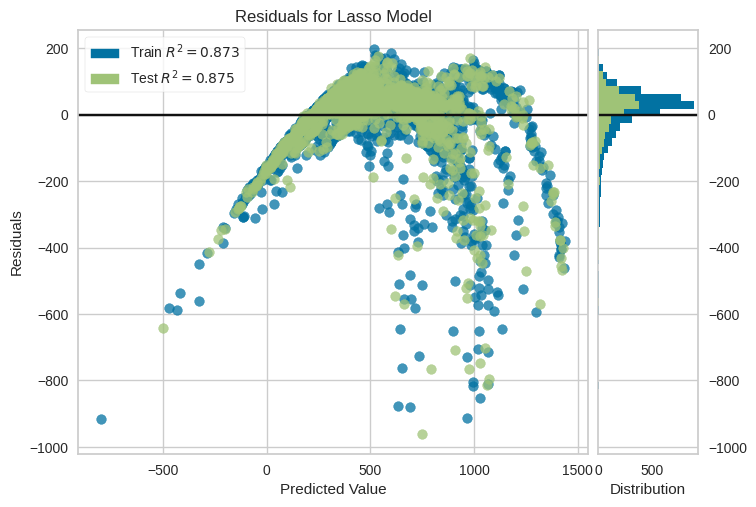

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [643]:
# Visualisasi menggunakan residual plot
visualizer = ResidualsPlot(selected_lasso)

visualizer.fit(X_train_lasso, y_train_lasso)
visualizer.score(X_test_lasso, y_test_lasso)
visualizer.show()

Grafik residual untuk Lasso regression menunjukkan pola penyebaran yang tidak sepenuhnya acak di sekitar garis nol, dengan sebagian besar residual terkonsentrasi di dekat nol tetapi membentuk pola melengkung yang mengindikasikan hubungan *non-linear* yang tidak ditangkap model. Nilai R² untuk data *training* (0,873) dan *testing* (0,875) sangat konsisten, menunjukkan performa model yang serupa pada kedua *dataset*. Namun, pola residual dan beberapa outlier besar mengindikasikan bahwa model belum sepenuhnya mampu menangkap kompleksitas hubungan antara fitur dan target.

Analisis hubungan perubahan nilai parameter *alpha*, parameter model, dan nilai R²

In [644]:
r_squared_list = []
parameter_model = []

for alpha, model in zip(lasso_alphas, lasso_model_list):
    y_pred_lasso = model.predict(X_test_lasso)
    R_squared = r2_score(y_test_lasso, y_pred_lasso)
    r_squared_list.append(R_squared)

    # Menyimpan parameter model
    coefficients = model.coef_
    intercept = model.intercept_
    parameter_model.append({
        'alpha': alpha,
        'coefficients': coefficients,
        'intercept': intercept
    })
    print()

# Menampilkan semua nilai R-squared yang disimpan
print("R-squared values untuk setiap alpha:")
for alpha, r2 in zip(lasso_alphas, r_squared_list):
    print(f'Alpha: {alpha}, R-squared (R²): {r2}')

# Menampilkan parameter model yang disimpan
print("\nParameter Model untuk setiap alpha:")
for params in parameter_model:
    print(f"Alpha: {params['alpha']}")
    print(f"Intercept: {params['intercept']}")
    print(f"Coefficients: {params['coefficients']}\n")














R-squared values untuk setiap alpha:
Alpha: 0.005, R-squared (R²): 0.8745137837297503
Alpha: 0.0125, R-squared (R²): 0.8745061564330885
Alpha: 0.025, R-squared (R²): 0.8744917550985476
Alpha: 0.05, R-squared (R²): 0.8744585156512898
Alpha: 0.1, R-squared (R²): 0.8743651783884401
Alpha: 0.25, R-squared (R²): 0.8738840452112041
Alpha: 0.5, R-squared (R²): 0.8724118602725575
Alpha: 1, R-squared (R²): 0.8697668459073078
Alpha: 2.5, R-squared (R²): 0.8584580005331213
Alpha: 5, R-squared (R²): 0.819306325763151
Alpha: 6.125, R-squared (R²): 0.7980329200635764
Alpha: 7.5, R-squared (R²): 0.7726450598687121
Alpha: 10, R-squared (R²): 0.7385184057556582

Parameter Model untuk setiap alpha:
Alpha: 0.005
Intercept: 583.3532010716932
Coefficients: [-1.40022868e+00  1.71606677e+01 -2.14639059e+01 -2.60388333e+02
  3.70361029e+00 -2.91320005e+00  4.27403703e+01  8.37293024e+00
 -7.93897360e+01  6.83825375e+01  5.47758645e-12  1.58661536e+01
  4.04297394e+02 -3.64771692e+02  9.06292697e+

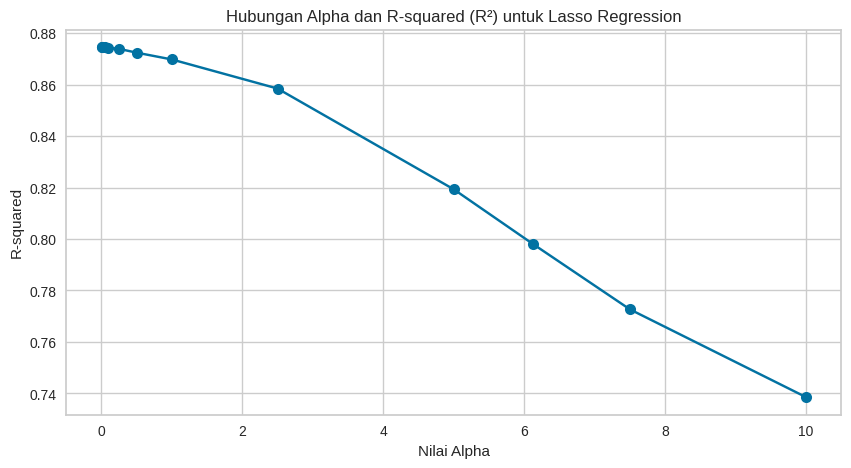

In [645]:
# Visualisasi hubungan Alpha dan R-squared
plt.figure(figsize=(10, 5))
plt.plot(lasso_alphas, r_squared_list, marker='o', color='b', linestyle='-', markersize=8)
plt.title('Hubungan Alpha dan R-squared (R²) untuk Lasso Regression')
plt.xlabel('Nilai Alpha')
plt.ylabel('R-squared')
plt.grid(True)
plt.show()

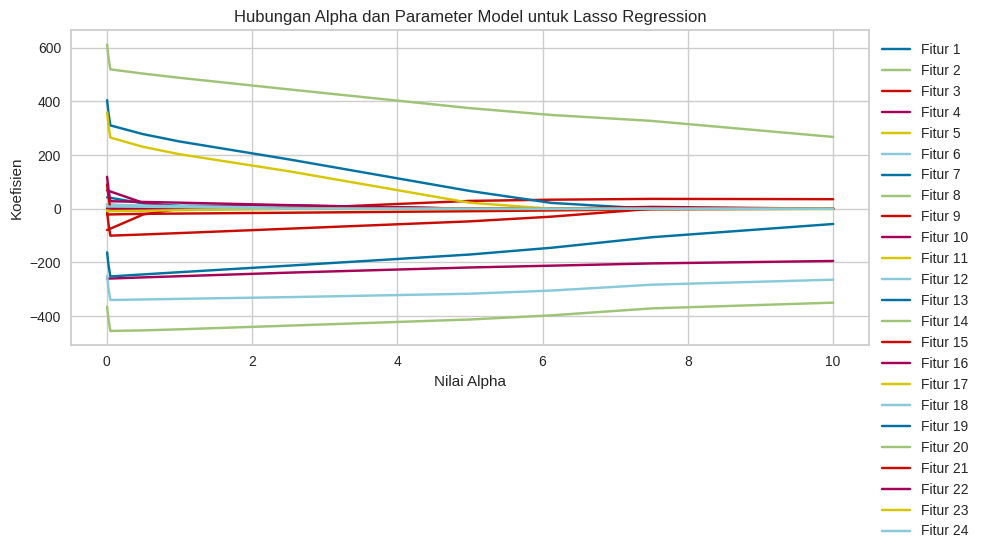

In [646]:
# Visualisasi hubungan Alpha dan Parameter Model
coefficients_array = np.array([model['coefficients'] for model in parameter_model])

plt.figure(figsize=(10, 5))
for i in range(coefficients_array.shape[1]):
    plt.plot(lasso_alphas, coefficients_array[:, i], label=f'Fitur {i+1}')

plt.title('Hubungan Alpha dan Parameter Model untuk Lasso Regression')
plt.xlabel('Nilai Alpha')
plt.ylabel('Koefisien')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

Dalam Lasso regression, nilai parameter alpha menentukan seberapa kuat model melakukan regularisasi terhadap koefisien fitur. Semakin besar nilai alpha, maka semakin banyak koefisien yang diatur menjadi nol, sehingga menghasilkan model yang lebih sederhana dengan lebih sedikit fitur yang digunakan (hanya yang penting saja). Hal ini bisa membuat model lebih mudah dipahami dan mencegah *overfitting*, tetapi juga bisa menurunkan kemampuan model untuk menjelaskan variasi data. Hal tersebut bisa dilihat dari nilai R-squared yang lebih rendah.<br>
<br>

Sebaliknya, nilai alpha yang lebih kecil memungkinkan lebih banyak fitur berkontribusi pada model, sehingga bisa meningkatkan nilai R-squared karena model jadi bisa menjelaskan variansi pada variabel dependen dan melihat lebih banyak pola dalam data. Akan tetapi, resiko *overfitting* juga meningkat karena model jadi lebih kompleks.<br>

#### *Test* Data

##### *Load and Process data*

In [647]:
test_data_lasso = pd.read_csv("https://drive.google.com/uc?id=1aKPCzUk-U1mOvYiMxuUfa_M2TDu_TMXq")

id_test = test_data_lasso['id'].copy()
test_data_lasso.drop(["id", "user_id"], axis=1, inplace=True)

##### Periksa *Missing Values*

In [648]:
# Cek missing values awal
print("Missing values before:")
print(test_data_lasso.isnull().sum())

Missing values before:
user_age_group           0
attempt_date             0
smt_rank                 0
smt_avg_spd              0
smt_name                 0
user_weight_category    39
act_title                0
act_avg_spd              0
act_max_spd              0
act_total_km             0
act_moving_seconds       0
act_total_seconds        0
has_hr_data              0
gender                   0
dtype: int64


In [649]:
mode_value = test_data_lasso['user_weight_category'].mode()[0]
test_data_lasso['user_weight_category'] = test_data_lasso['user_weight_category'].fillna(mode_value)

##### *Data Encoding*

In [650]:
# Mapping User Age Group
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}
test_data_lasso['user_age_group'] = test_data_lasso['user_age_group'].map(age_mapping)
test_data_lasso

user_age_group attempt_date  smt_rank  ...  act_total_seconds has_hr_data gender
0                 2   2018-07-15        33  ...               4326           0   male
1                 2   2018-01-03       181  ...               6427           0   male
2                 2   2019-07-19         3  ...              12507           0   male
3                 4   2018-06-22       142  ...               6254           0   male
4                 3   2018-08-29       216  ...               9398           0   male
..              ...          ...       ...  ...                ...         ...    ...
782               2   2018-05-17        60  ...               8151           0   male
783               3   2018-07-16       221  ...               9187           0   male
784               3   2015-12-07       401  ...               9959           0   male
785               2   2017-05-10       184  ...               4913           0   male
786               3   2016-04-11       336  ...               2158           0   male

[787 rows x 14 columns]

In [651]:
# Mapping Gender
gender_mapping = {
    'male': 2,
    'female': 1
}
test_data_lasso['gender'] = test_data_lasso['gender'].map(gender_mapping)
test_data_lasso

user_age_group attempt_date  smt_rank  ...  act_total_seconds has_hr_data gender
0                 2   2018-07-15        33  ...               4326           0      2
1                 2   2018-01-03       181  ...               6427           0      2
2                 2   2019-07-19         3  ...              12507           0      2
3                 4   2018-06-22       142  ...               6254           0      2
4                 3   2018-08-29       216  ...               9398           0      2
..              ...          ...       ...  ...                ...         ...    ...
782               2   2018-05-17        60  ...               8151           0      2
783               3   2018-07-16       221  ...               9187           0      2
784               3   2015-12-07       401  ...               9959           0      2
785               2   2017-05-10       184  ...               4913           0      2
786               3   2016-04-11       336  ...               2158           0      2

[787 rows x 14 columns]

In [652]:
# Mapping User Weight Category
weight_mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}
test_data_lasso['user_weight_category'] = test_data_lasso['user_weight_category'].map(weight_mapping)
test_data_lasso

user_age_group attempt_date  smt_rank  ...  act_total_seconds has_hr_data  gender
0                 2   2018-07-15        33  ...               4326           0       2
1                 2   2018-01-03       181  ...               6427           0       2
2                 2   2019-07-19         3  ...              12507           0       2
3                 4   2018-06-22       142  ...               6254           0       2
4                 3   2018-08-29       216  ...               9398           0       2
..              ...          ...       ...  ...                ...         ...     ...
782               2   2018-05-17        60  ...               8151           0       2
783               3   2018-07-16       221  ...               9187           0       2
784               3   2015-12-07       401  ...               9959           0       2
785               2   2017-05-10       184  ...               4913           0       2
786               3   2016-04-11       336  ...               2158           0       2

[787 rows x 14 columns]

In [653]:
# Mapping Segment Name
test_data_lasso = pd.get_dummies(test_data_lasso, columns=['smt_name'], drop_first=False)
test_data_lasso

user_age_group  ... smt_name_Starbucks to Majid
0                 2  ...                       False
1                 2  ...                        True
2                 2  ...                       False
3                 4  ...                       False
4                 3  ...                        True
..              ...  ...                         ...
782               2  ...                       False
783               3  ...                       False
784               3  ...                       False
785               2  ...                       False
786               3  ...                       False

[787 rows x 22 columns]

In [654]:
# Frequency Encoding untuk act_title
freq_map = test_data_lasso['act_title'].value_counts(normalize=True)
test_data_lasso['act_title'] = test_data_lasso['act_title'].map(freq_map)
test_data_lasso

user_age_group  ... smt_name_Starbucks to Majid
0                 2  ...                       False
1                 2  ...                        True
2                 2  ...                       False
3                 4  ...                       False
4                 3  ...                        True
..              ...  ...                         ...
782               2  ...                       False
783               3  ...                       False
784               3  ...                       False
785               2  ...                       False
786               3  ...                       False

[787 rows x 22 columns]

In [655]:
# Encoding attempt_date
test_data_lasso['attempt_date'] = pd.to_datetime(test_data_lasso['attempt_date'])
test_data_lasso['attempt_year'] = test_data_lasso['attempt_date'].dt.year
test_data_lasso['attempt_month'] = test_data_lasso['attempt_date'].dt.month
test_data_lasso['attempt_day'] = test_data_lasso['attempt_date'].dt.day

test_data_lasso = test_data_lasso.drop('attempt_date', axis=1)
test_data_lasso

user_age_group  smt_rank  smt_avg_spd  ...  attempt_year  attempt_month  attempt_day
0                 2        33         36.9  ...          2018              7           15
1                 2       181         26.2  ...          2018              1            3
2                 2         3         56.0  ...          2019              7           19
3                 4       142         11.1  ...          2018              6           22
4                 3       216         22.2  ...          2018              8           29
..              ...       ...          ...  ...           ...            ...          ...
782               2        60         32.3  ...          2018              5           17
783               3       221         24.0  ...          2018              7           16
784               3       401         18.4  ...          2015             12            7
785               2       184         32.1  ...          2017              5           10
786               3       336         21.1  ...          2016              4           11

[787 rows x 24 columns]

In [656]:
# Mengatur ulang urutan kolom fitur agar bisa di-predict
columns = list(test_data_lasso.columns)

columns.remove('gender')
columns.insert(1, 'gender')

test_data_lasso = test_data_lasso[columns]

In [657]:
test_data_lasso.isnull().sum()

user_age_group                                         0
gender                                                 0
smt_rank                                               0
smt_avg_spd                                            0
user_weight_category                                   0
act_title                                              0
act_avg_spd                                            0
act_max_spd                                            0
act_total_km                                           0
act_moving_seconds                                     0
act_total_seconds                                      0
has_hr_data                                            0
smt_name_Al Fardoos to shellfish round about           0
smt_name_Headquarters Business Park                    0
smt_name_King Street side                              0
smt_name_North Corniche                                0
smt_name_Obhur North Short                             0
smt_name_Oghor 2 SailsIsland                           0
smt_name_PRINCE SULTAN - ASSALAM TO FATIMA             0
smt_name_S.Ubhur Alkurnaysh South Bound with detour    0
smt_name_Starbucks to Majid                            0
attempt_year                                           0
attempt_month                                          0
attempt_day                                            0
dtype: int64

In [658]:
# Melakukan standarisasi (pake RobustScaler)
scaler = RobustScaler()

test_data_lasso[test_data_lasso.columns] = scaler.fit_transform(test_data_lasso)
test_data_lasso

user_age_group  gender  smt_rank  ...  attempt_year  attempt_month  attempt_day
0               0.0     0.0 -0.336207  ...           0.0       0.142857     0.000000
1               0.0     0.0  0.301724  ...           0.0      -0.714286    -0.857143
2               0.0     0.0 -0.465517  ...           0.5       0.142857     0.285714
3               2.0     0.0  0.133621  ...           0.0       0.000000     0.500000
4               1.0     0.0  0.452586  ...           0.0       0.285714     1.000000
..              ...     ...       ...  ...           ...            ...          ...
782             0.0     0.0 -0.219828  ...           0.0      -0.142857     0.142857
783             1.0     0.0  0.474138  ...           0.0       0.142857     0.071429
784             1.0     0.0  1.250000  ...          -1.5       0.857143    -0.571429
785             0.0     0.0  0.314655  ...          -0.5      -0.142857    -0.357143
786             1.0     0.0  0.969828  ...          -1.0      -0.285714    -0.285714

[787 rows x 24 columns]

##### *Predict data test*

In [659]:
test_lasso_predictions = linreg.predict(test_data_lasso)

# Membuat file untuk submission kaggle
submission = pd.DataFrame({
'id': id_test,  # Gunakan id yang sudah disimpan
'smt_finish_secondsr': test_lasso_predictions
})

submission.to_csv('CSL_Submission_LassoReg.csv', index=False)
submission

id  smt_finish_secondsr
0    2699           207.538326
1     332           573.476026
2    3282          -329.387118
3    5891          1039.806134
4     858           677.472555
..    ...                  ...
782  2726           289.698037
783  7350           264.875925
784  4370           498.764233
785  4979           558.817313
786  7462           341.399879

[787 rows x 2 columns]

In [660]:
test_lasso_predictions = selected_lasso.predict(test_data_lasso)

# Membuat file untuk submission kaggle
submission = pd.DataFrame({
'id': id_test,  # Gunakan id yang sudah disimpan
'smt_finish_secondsr': test_lasso_predictions
})

submission.to_csv('CSL_Submission_LassoReg.csv', index=False)
submission

id  smt_finish_secondsr
0    2699           207.582451
1     332           573.523789
2    3282          -329.233694
3    5891          1039.689916
4     858           677.491918
..    ...                  ...
782  2726           289.813855
783  7350           264.934217
784  4370           498.658821
785  4979           558.822133
786  7462           341.533169

[787 rows x 2 columns]

# *Hierarchical Clustering*

#### *Load Data*

In [679]:
df_clustering = df_rf.copy()
df_clustering

user_age_group  gender  smt_rank  ...  attempt_year  attempt_month  attempt_day
0                  2       2       712  ...          2017             12           22
1                  2       2       189  ...          2015              4           13
2                  2       2       264  ...          2018              2            7
3                  2       2        50  ...          2018              8           24
4                  2       1        19  ...          2020              3            6
...              ...     ...       ...  ...           ...            ...          ...
6287               2       2       431  ...          2018              7           16
6288               3       2        34  ...          2018             11           21
6289               3       2       218  ...          2013              8           11
6290               3       2       477  ...          2015              4           24
6291               3       2       142  ...          2019              4           25

[6292 rows x 25 columns]

#### Pemilihan Fitur

Saya akan menggunakan 3 fitur, yaitu `act_total_km`, `gender`, dan `act_avg_spd`

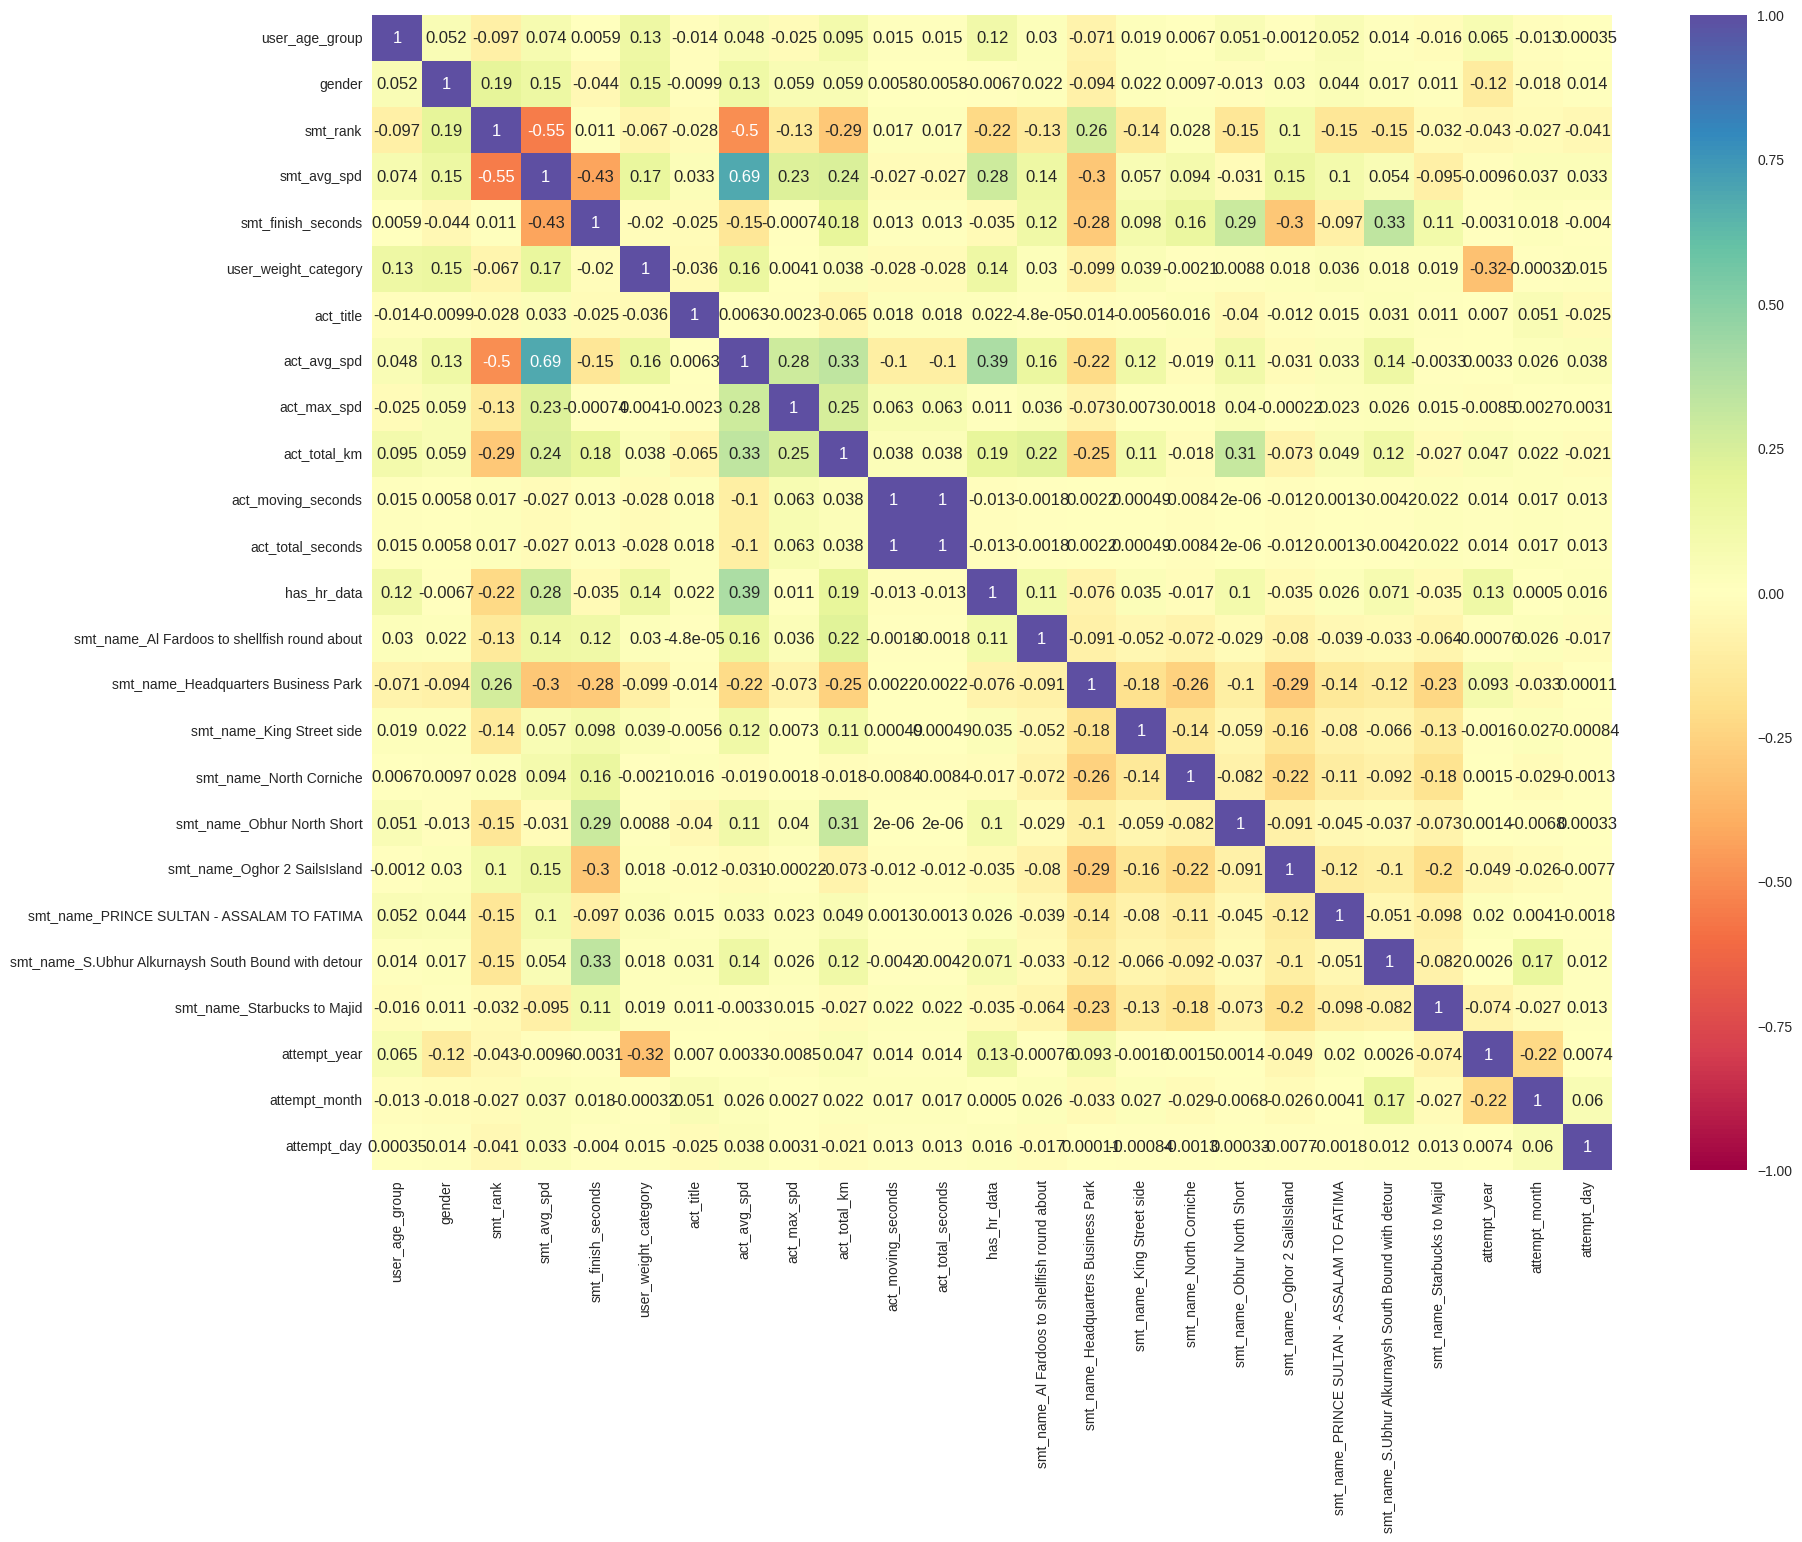

In [685]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_clustering.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

Pemilihan fitur `act_total_km`, `gender`, dan `act_avg_spd` untuk *clustering* karena beberapa hal berikut :
* Ketiga fitur ini memiliki korelasi yang tidak terlalu kuat antar satu sama lain, sehingga masing-masing memberikan informasi yang unik dan menghindari redundansi.
* `act_total_km` mencerminkan kapasitas bersepeda, `gender` menggambarkan demografi peserta, dan `act_avg_spd` menunjukkan performa kecepatan rata-rata.
* Fitur-fitur ini relevan untuk mengelompokkan pesepeda berdasarkan jarak tempuh, jenis kelamin, dan kecepatan, sehingga segmentasi menjadi lebih akurat.
* Dengan memilih fitur yang tidak berkorelasi tinggi, bisa menghindari potensi bias dalam hasil *clustering* yang dapat disebabkan oleh fitur-fitur yang saling terkait.

#### *Pre-processing*

In [662]:
# Hanya pertahankan fitur yang akan digunakan
fitur_dipakai = ['act_total_km', 'gender', 'act_avg_spd']

df_clustering = df_clustering[fitur_dipakai]
df_clustering

act_total_km  gender  act_avg_spd
0            19.24       2         13.6
1            23.47       2         21.5
2            38.23       2         26.7
3            65.77       2         31.4
4            96.53       1         19.9
...            ...     ...          ...
6287         41.93       2         17.9
6288         48.13       2         34.5
6289         50.64       2         17.6
6290         40.93       2         14.5
6291         43.39       2         18.4

[6292 rows x 3 columns]

##### Pengananan *Outliers*

In [663]:
# Periksa outlier
hitung_outlier(df_clustering)

act_total_km      gender  act_avg_spd
Outliers count             308.000000  253.000000    94.000000
Outliers percentage (%)      4.895105    4.020979     1.493961

<Axes: >

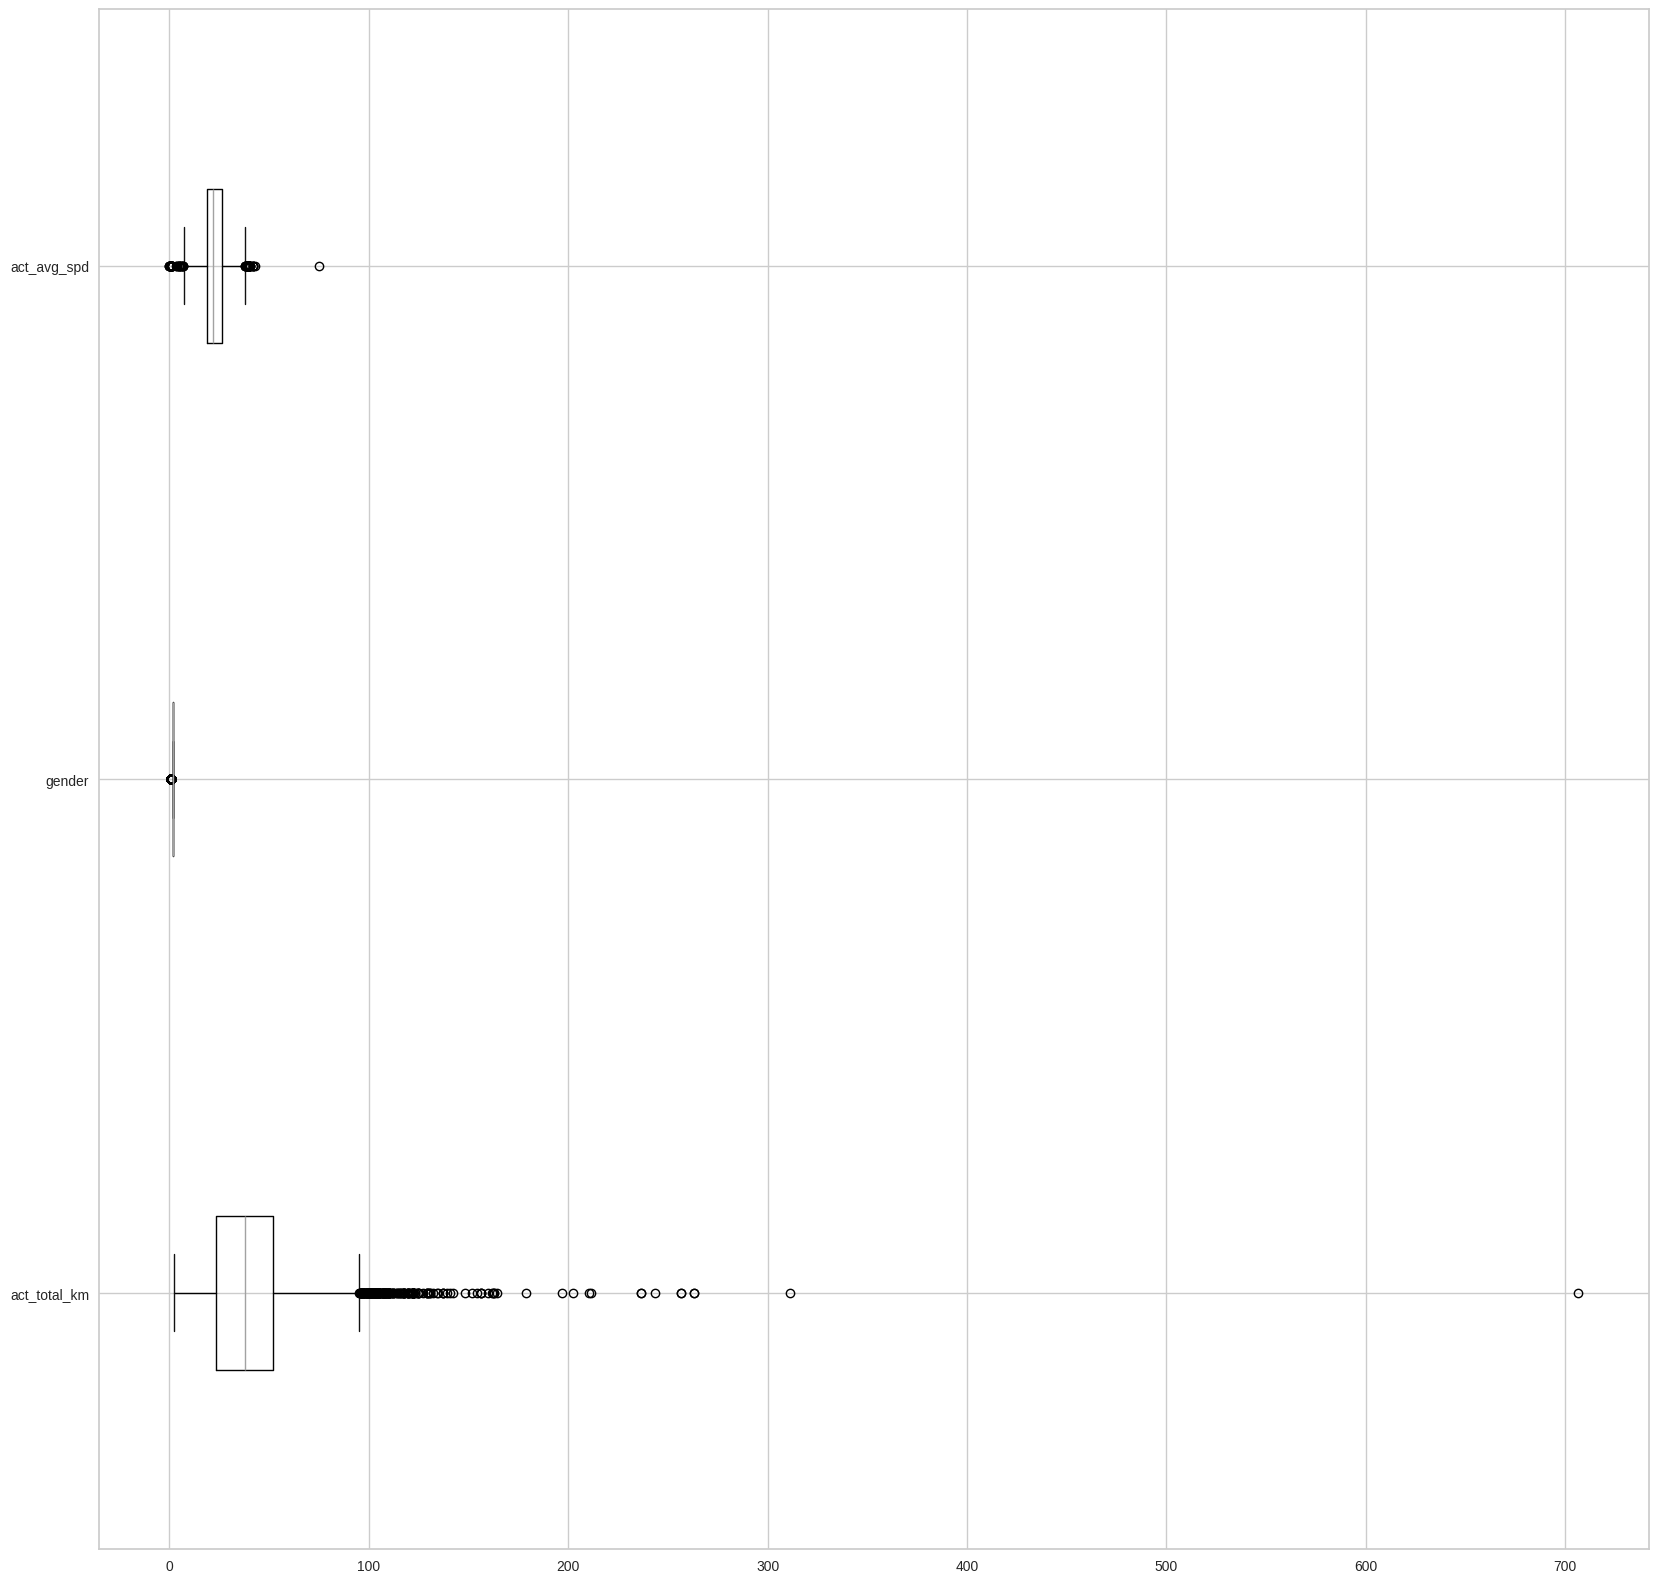

In [664]:
df_clustering.boxplot(vert=False, figsize=(20,20))

In [665]:
# Hapus outlier yang tak wajar
def hapus_outliers_tertinggi(df, col, percentage=25):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1

    outliers = df[col] > (q3 + 1.5 * iqr)
    outliers_index = df[outliers].index

    # Ambil 25% nilai tertinggi di antara outliers
    outliers_values = df.loc[outliers_index, col].sort_values(ascending=False)
    n_remove = int(len(outliers_values) * (percentage / 100))
    to_remove = outliers_values.head(n_remove).index

    return df.drop(index=to_remove)

df_clustering = hapus_outliers_tertinggi(df_clustering, 'act_total_km', percentage=25)
df_clustering = hapus_outliers_tertinggi(df_clustering, 'act_avg_spd', percentage=25)

<Axes: >

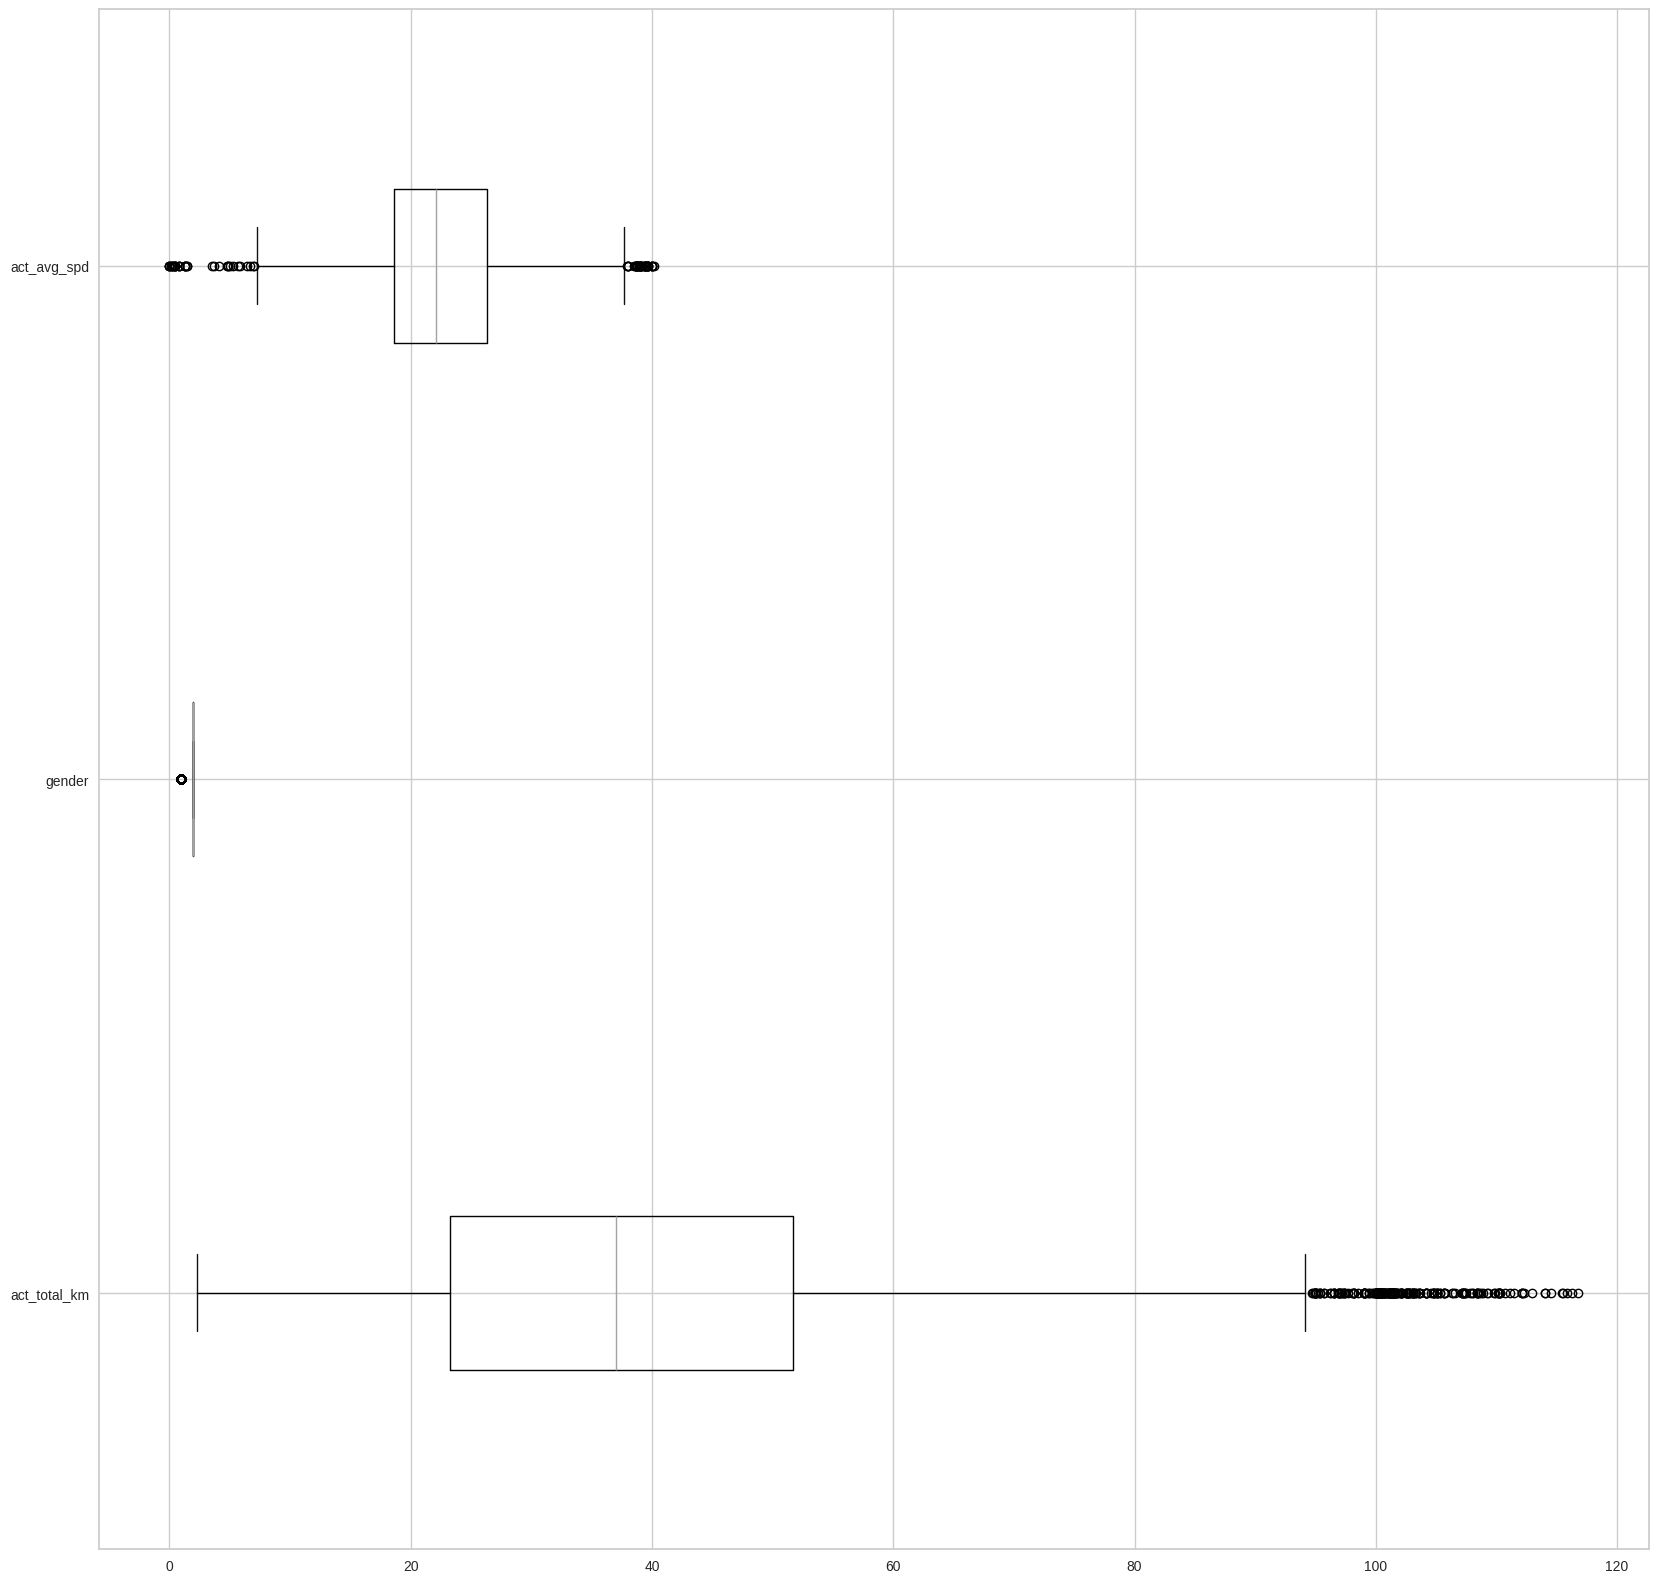

In [666]:
df_clustering.boxplot(vert=False, figsize=(20,20))

##### Standarisasi

In [667]:
# Melakukan standarisasi (pake MinMaxScaler)
scaler = MinMaxScaler()

df_clustering[df_clustering.columns] = scaler.fit_transform(df_clustering)
df_clustering

act_total_km  gender  act_avg_spd
0         0.148109     1.0     0.338308
1         0.185049     1.0     0.534826
2         0.313946     1.0     0.664179
3         0.554449     1.0     0.781095
4         0.823072     0.0     0.495025
...            ...     ...          ...
6287      0.346258     1.0     0.445274
6288      0.400402     1.0     0.858209
6289      0.422321     1.0     0.437811
6290      0.337525     1.0     0.360697
6291      0.359008     1.0     0.457711

[6201 rows x 3 columns]

#### *Agglomerative clustering* (Metode *Average*)

Tanpa menspesifikasikan jumlah *cluster*

In [668]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative clustering
agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
cluster_assignment = agglomerative.fit(df_clustering)

cluster_assignment.labels_

array([4987, 6197, 6196, ...,    3,    1,    0])

##### Menentukan jumlah *cluster*

In [669]:
from scipy.cluster import hierarchy as shc

# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

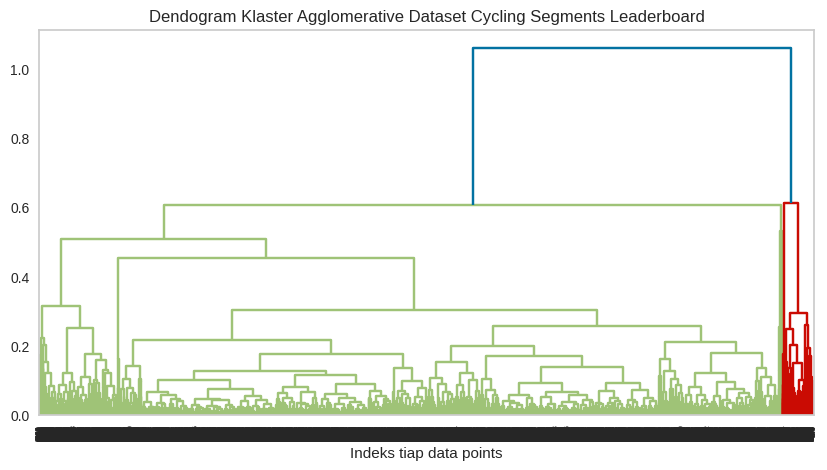

In [670]:
# Dendogram
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset Cycling Segments Leaderboard")
plt.xlabel("Indeks tiap data points")
plt.show()

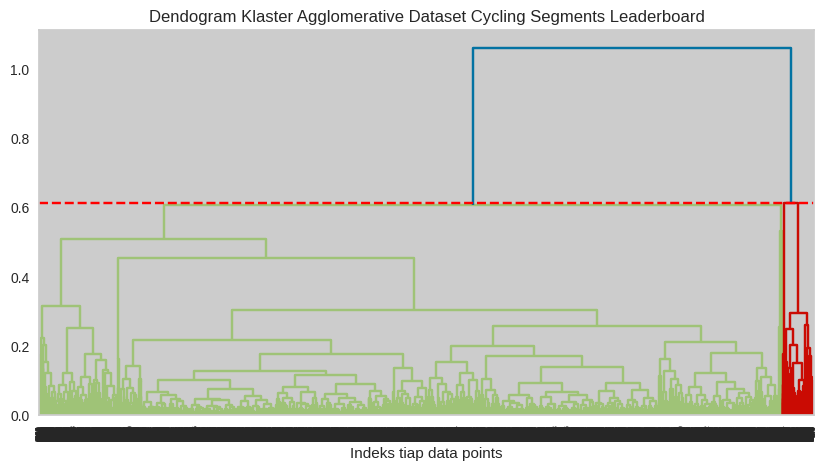

In [671]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_clustering, 'average')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendogram Klaster Agglomerative Dataset Cycling Segments Leaderboard")
plt.xlabel("Indeks tiap data points")

distances = linked[:, 2]
sorted_distances = np.sort(distances)
diffs = np.diff(sorted_distances)
idx = np.argmax(diffs)
max_d = sorted_distances[idx] # Threshold

plt.axhline(y=max_d, c='red', linestyle = 'dashed')

plt.show()

##### *Training* Model

In [672]:
# Definisikan model dengan hasil visualisasi sebelumnya
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='average')
cluster_assignment = agglomerative.fit_predict(df_clustering)

In [673]:
# Append hasil clustering ke dataframe
df_with_clusters_agg = pd.DataFrame(df_clustering.copy())
df_with_clusters_agg['cluster'] = cluster_assignment
df_with_clusters_agg.head()

act_total_km  gender  act_avg_spd  cluster
0      0.148109     1.0     0.338308        1
1      0.185049     1.0     0.534826        1
2      0.313946     1.0     0.664179        1
3      0.554449     1.0     0.781095        1
4      0.823072     0.0     0.495025        2

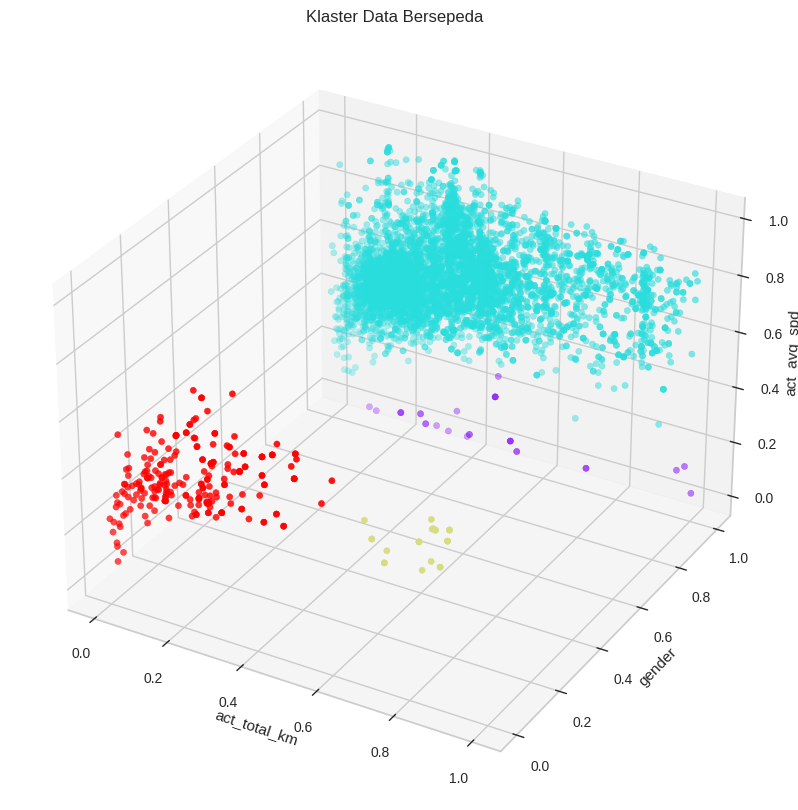

In [674]:
# Visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

x = df_with_clusters_agg['act_total_km']
y = df_with_clusters_agg['gender']
z = df_with_clusters_agg['act_avg_spd']
cluster = df_with_clusters_agg['cluster']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Bersepeda")
plt.grid(False)
ax.set_xlabel('act_total_km')
ax.set_ylabel('gender')
ax.set_zlabel('act_avg_spd')

plt.show()

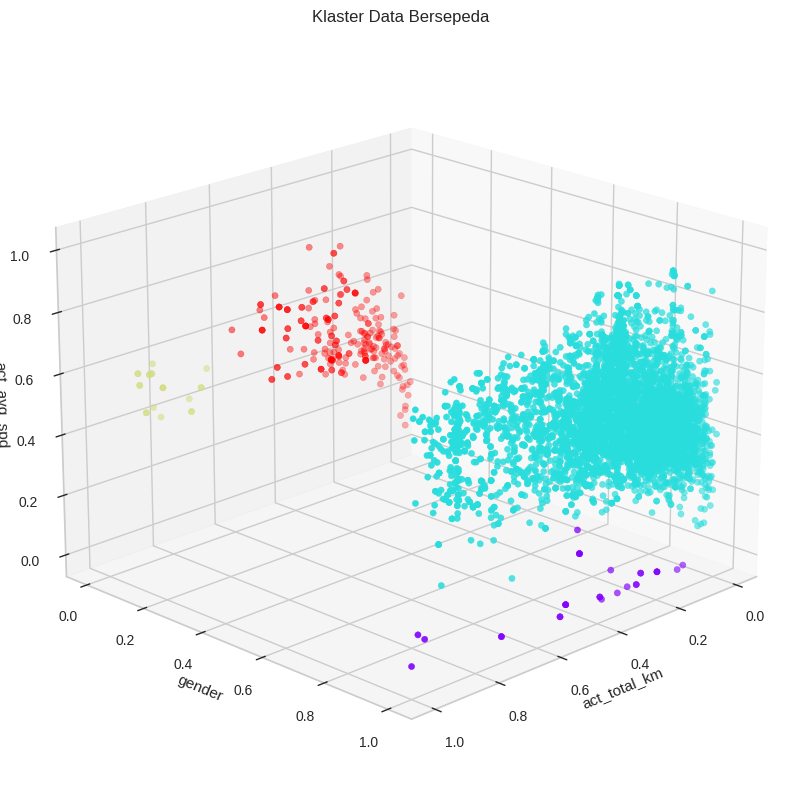

In [675]:
# Visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

x = df_with_clusters_agg['act_total_km']
y = df_with_clusters_agg['gender']
z = df_with_clusters_agg['act_avg_spd']
cluster = df_with_clusters_agg['cluster']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")

# Ganti angle
ax.view_init(elev=20, azim=45)

plt.title("Klaster Data Bersepeda")
plt.grid(False)
ax.set_xlabel('act_total_km')
ax.set_ylabel('gender')
ax.set_zlabel('act_avg_spd')

plt.show()

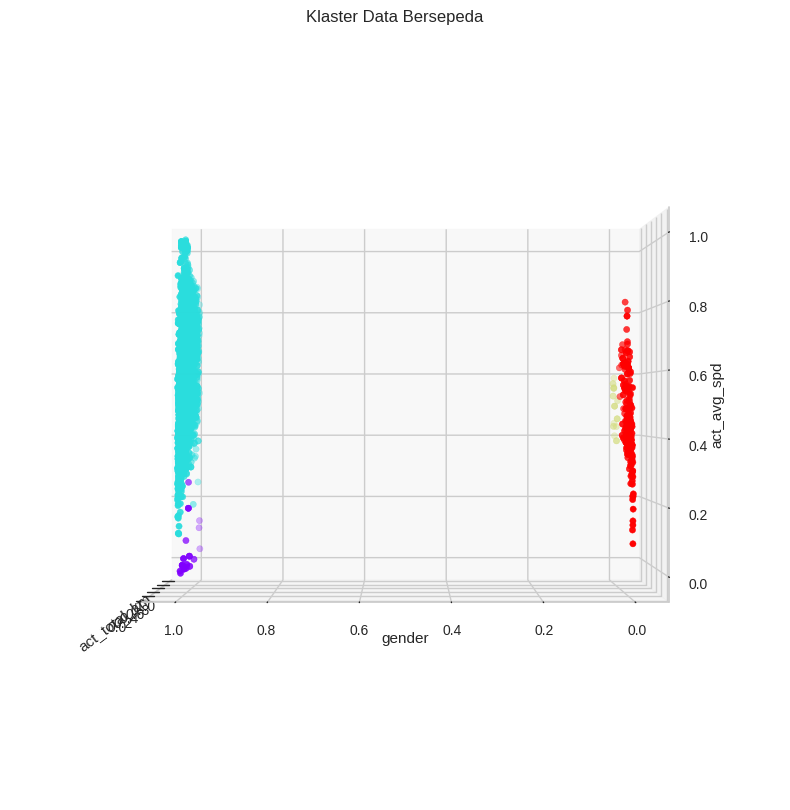

In [676]:
# Visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

x = df_with_clusters_agg['act_total_km']
y = df_with_clusters_agg['gender']
z = df_with_clusters_agg['act_avg_spd']
cluster = df_with_clusters_agg['cluster']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")

# Ganti angle
ax.view_init(elev=0, azim=180)

plt.title("Klaster Data Bersepeda")
plt.grid(False)
ax.set_xlabel('act_total_km')
ax.set_ylabel('gender')
ax.set_zlabel('act_avg_spd')

plt.show()

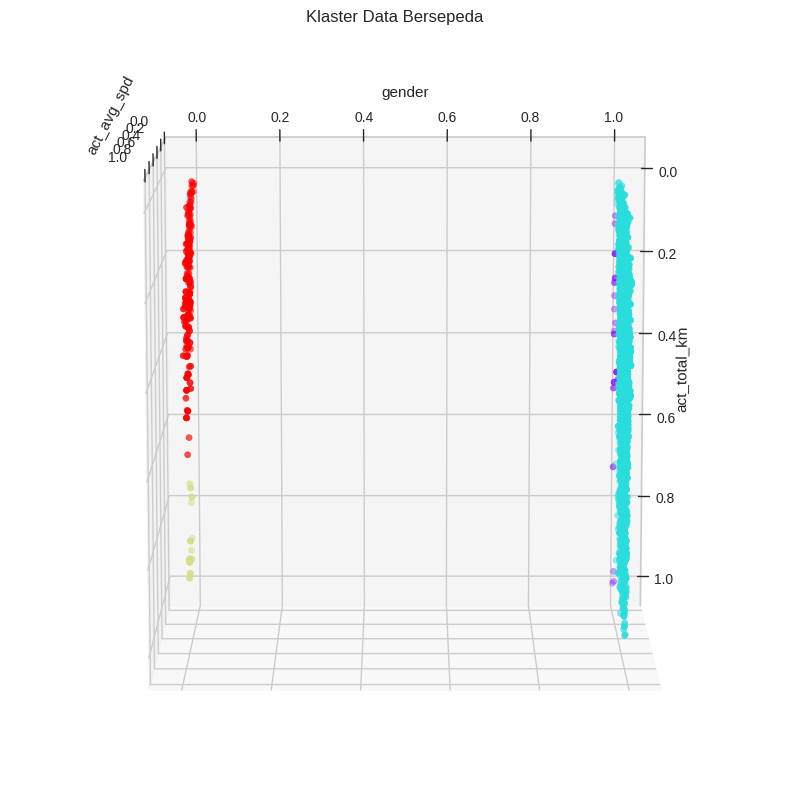

In [677]:
# Visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

x = df_with_clusters_agg['act_total_km']
y = df_with_clusters_agg['gender']
z = df_with_clusters_agg['act_avg_spd']
cluster = df_with_clusters_agg['cluster']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")

# Ganti angle
ax.view_init(elev=100, azim=0)

plt.title("Klaster Data Bersepeda")
plt.grid(False)
ax.set_xlabel('act_total_km')
ax.set_ylabel('gender')
ax.set_zlabel('act_avg_spd')

plt.show()

##### Karakteristik *Cluster*

Hasil *clustering* mengungkapkan pola performa bersepeda yang berbeda berdasarkan gender, kecepatan rata-rata, dan total jarak tempuh. Klaster biru muda menunjukkan kelompok laki-laki dengan kecepatan rata-rata yang tinggi dan total jarak tempuh yang merata. Sebaliknya, klaster ungu juga terdiri dari laki-laki, tetapi dengan kecepatan rata-rata yang rendah dan total jarak tempuh yang tetap merata. Hal ini mencerminkan variasi kemampuan dalam kelompok laki-laki, di mana ada yang berfokus pada kecepatan tinggi dan ada yang lebih lambat.

Sementara itu, klaster merah dan kuning mencerminkan performa perempuan. Klaster merah terdiri dari perempuan dengan total jarak tempuh yang merata dari tapi tidak sampai sejauh klaster kuning dan kecepatan rata-rata yang tidak secepat laki-laki, tetapi tetap bervariasi. Klaster kuning, di sisi lain, menunjukkan perempuan dengan total jarak tempuh yang lebih jauh  dan kecepatan rata-rata yang serupa dengan klaster merah. Pola ini menunjukkan perbedaan gaya bersepeda antara laki-laki dan perempuan, di mana laki-laki cenderung lebih fokus pada kecepatan, sementara perempuan menunjukkan konsistensi jarak tempuh yang lebih jelas pada kelompok tertentu.